### <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;">Importing Necessary Libraries

In [1]:
#Arrays
import numpy as np
# Data Frames
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import pylab
from statsmodels.graphics.regressionplots import *
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostRegressor

C:\Users\Mike\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;">Display Settings

In [2]:
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1500)

sns.set_style('dark')

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;">Visualization Settings

In [3]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
# Adapted from http://spartanideas.msu.edu/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/


def visualization_settings():
    plt.clf()
    sns.set_style({"xtick.major.size":30,"ytick.major.size":30})
    plt.figure(figsize=(16,8))
    sns.set(font_scale=1.4)

### <p><span style="color: Red; font-family: Babas; font-size: 1.em;">Reading the CSV File

In [4]:
df = pd.read_csv('Cleaned_Austin_House_Price.csv')

In [5]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1951,1,98125,47.7210,-122.319,1690,7639
2,2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1965,0,98136,47.5208,-122.393,1360,5000
4,4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### <p><span style="color: Red; font-family: Babas; font-size: 1.em;">Dropping Unnamed Column

In [6]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1951,1,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'basement', 'yr_built', 'renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 19 columns):
price            21612 non-null int64
bedrooms         21612 non-null int64
bathrooms        21612 non-null float64
sqft_living      21612 non-null int64
sqft_lot         21612 non-null int64
floors           21612 non-null float64
waterfront       21612 non-null int64
view             21612 non-null int64
condition        21612 non-null int64
grade            21612 non-null int64
sqft_above       21612 non-null int64
basement         21612 non-null int64
yr_built         21612 non-null int64
renovated        21612 non-null int64
zipcode          21612 non-null int64
lat              21612 non-null float64
long             21612 non-null float64
sqft_living15    21612 non-null int64
sqft_lot15       21612 non-null int64
dtypes: float64(4), int64(15)
memory usage: 3.1 MB


In [10]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
basement         0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;">Creating Indendent and Dependent Variables

In [11]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'basement', 'yr_built', 'renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = df.price

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Splitting the Data 

In [12]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5)

## <p><span style="color: Red; font-family: Babas; font-size: 1.em;">Scaling the Independent Variables

In [13]:
#X_train_sub = X_train[['waterfront','view', 'basement', 'renovated']]
#col_names = list(X_train_sub)
#print("\nNames of dataframe columns")
#print(col_names)

# loop to change each column to category type
#for col in col_names:
#    X_train_sub[col] = X_train_sub[col].astype('category',copy=False)

#print("\nExample data changed to category type")
#print(X_train_sub)
#print(X_train_sub.dtypes)

In [14]:
#X_train_sub.info()

In [15]:
sc = StandardScaler()

X_scaled = X_train.drop(['waterfront','view', 'basement', 'renovated'], axis=1)
X_scaled = pd.DataFrame(sc.fit_transform(X_scaled), 
                        columns=X_scaled.columns.values,
                        index=X_scaled.index)


X_scaled[['waterfront','view', 'basement', 'renovated']] = X_train[['waterfront','view', 'basement', 'renovated']]
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16209 entries, 10306 to 2915
Data columns (total 18 columns):
bedrooms         16209 non-null float64
bathrooms        16209 non-null float64
sqft_living      16209 non-null float64
sqft_lot         16209 non-null float64
floors           16209 non-null float64
condition        16209 non-null float64
grade            16209 non-null float64
sqft_above       16209 non-null float64
yr_built         16209 non-null float64
zipcode          16209 non-null float64
lat              16209 non-null float64
long             16209 non-null float64
sqft_living15    16209 non-null float64
sqft_lot15       16209 non-null float64
waterfront       16209 non-null int64
view             16209 non-null int64
basement         16209 non-null int64
renovated        16209 non-null int64
dtypes: float64(14), int64(4)
memory usage: 2.3 MB


In [16]:
X_test_scaled = X_test.drop(['waterfront','view', 'basement', 'renovated'], axis=1)
X_test_scaled = pd.DataFrame(sc.transform(X_test_scaled), 
                        columns=X_test_scaled.columns.values,
                        index=X_test_scaled.index)


X_test_scaled[['waterfront','view', 'basement', 'renovated']] = X_test[['waterfront','view', 'basement', 'renovated']]
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5403 entries, 17485 to 7611
Data columns (total 18 columns):
bedrooms         5403 non-null float64
bathrooms        5403 non-null float64
sqft_living      5403 non-null float64
sqft_lot         5403 non-null float64
floors           5403 non-null float64
condition        5403 non-null float64
grade            5403 non-null float64
sqft_above       5403 non-null float64
yr_built         5403 non-null float64
zipcode          5403 non-null float64
lat              5403 non-null float64
long             5403 non-null float64
sqft_living15    5403 non-null float64
sqft_lot15       5403 non-null float64
waterfront       5403 non-null int64
view             5403 non-null int64
basement         5403 non-null int64
renovated        5403 non-null int64
dtypes: float64(14), int64(4)
memory usage: 802.0 KB


In [17]:
X_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront,view,basement,renovated
10306,-1.523494,-0.150758,-0.423456,-0.268903,0.935784,-0.631400,-0.561026,-0.117589,-2.207585,0.633921,0.439318,-0.628308,-0.648155,-0.316991,0,0,0,0
10180,0.700918,0.498283,0.318960,0.664151,0.935784,-0.631400,0.295413,0.703373,0.820443,-0.020103,1.286273,1.147584,0.527549,1.267617,0,0,0,0
4638,0.700918,0.173762,0.155192,2.897823,0.935784,-0.631400,0.295413,0.522278,0.616306,-0.954424,-0.445313,2.223025,1.027223,4.403133,0,0,0,0
15437,-0.411288,0.173762,0.602825,-0.050350,0.935784,0.904138,1.151853,1.017270,-0.166218,-0.711500,-0.090301,-0.133039,1.703253,0.097998,0,0,0,0
19223,-0.411288,-1.448840,-1.154954,-0.183105,-0.913649,-0.631400,-0.561026,-0.926478,0.344124,-0.375145,-0.950299,0.440057,-0.751029,-0.118639,0,0,0,0


## <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;">Linear Regression Model

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Linear Regression parameter keys

In [18]:
lm = LinearRegression()
lm.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Fitting the Model

In [19]:
lm = LinearRegression()
# Fit the model on the trainng data.
grid = GridSearchCV(estimator=lm, param_grid={}, cv = 5)

grid.fit(X_scaled, y_train)
print('Best_score of the Grid CV: {}'.format(grid.best_score_))
print ('---------------------------')
print('Best parameters of Linear Regression:', grid.best_params_)
print ('---------------------------')
price_actual = y_test
price_predict = grid.predict(X_test_scaled)
print('R-squared score: %.2f' % r2_score(price_actual, price_predict))

Best_score of the Grid CV: 0.6947390542232612
---------------------------
Best parameters of Linear Regression: {}
---------------------------
R-squared score: 0.71


**With the default Linear Regression we got R-squared value 0.71**

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Applying Best Parameters with Linear Regression

In [20]:
lm = LinearRegression (copy_X = True, normalize = True, n_jobs = 1, fit_intercept = True)
lm.fit(X_scaled, y_train)
price_actual = y_test
price_predict = grid.predict(X_test_scaled)
print('R-squared score: %.2f' % r2_score(price_actual, price_predict))

R-squared score: 0.71


In [21]:
print (lm.intercept_)

522978.112902


**Intercept of the model is written below**

In [22]:
lm.coef_

array([ -33612.29036077,   30086.49340219,  143380.90574863,
          5883.89427215,    3631.42464463,   16823.25711292,
        110637.21778115,   22663.34778805,  -77625.27794391,
        -29869.09646963,   83196.40735041,  -30141.29242575,
         16196.09331177,  -11435.52728486,  580485.83834328,
         52543.57938379,   -4787.31707817,   42065.23667456])

**Coefficients of each features**

#### Coefficients

In [23]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

In [24]:
cdf

,Coeff
bedrooms,-33612.290361
bathrooms,30086.493402
sqft_living,143380.905749
sqft_lot,5883.894272
floors,3631.424645
waterfront,16823.257113
view,110637.217781
condition,22663.347788
grade,-77625.277944
sqft_above,-29869.096470


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

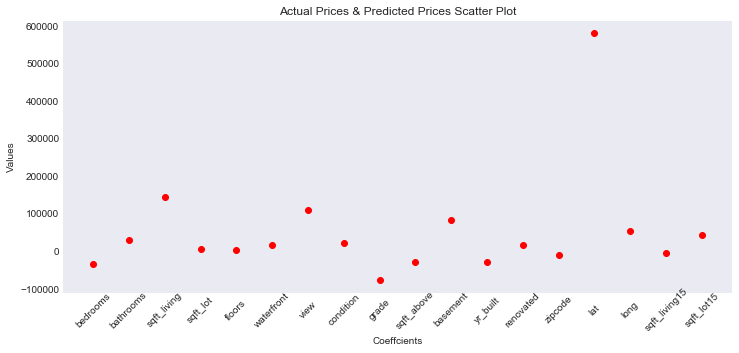

In [25]:
plt.figure(figsize = (12,5))
visualization_settings
plt.plot(cdf, 'ro')
plt.ylabel('Values')
plt.xlabel('Coeffcients')
plt.title('Actual Prices & Predicted Prices Scatter Plot')
plt.xticks(rotation = 45, va="center", position=(0,-0.05))

**According to the default Linear Regression model, bedrooms, grade, sqft_above, yr_built, sqft_living15 and zipcode have negative coefficients, latitude has the biggest value.** 

#### Actual Price vs. Predicted Price

Text(0.5,1,'Actual Prices & Predicted Prices Scatter Plot')

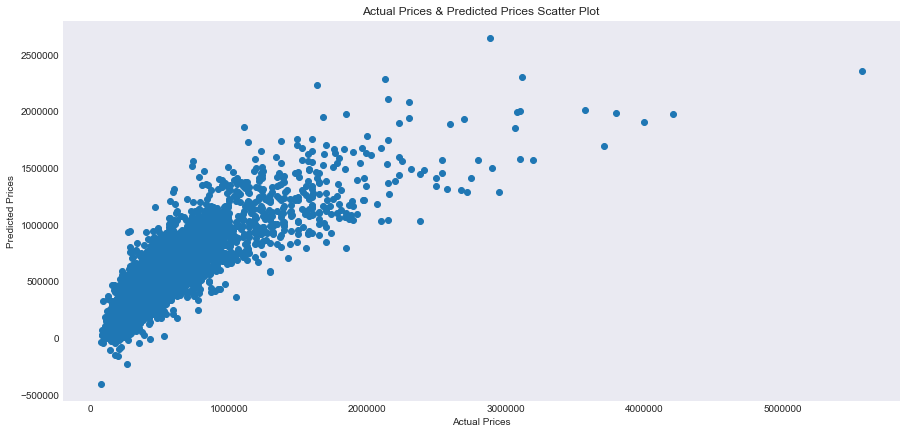

In [26]:
plt.figure(figsize = (15,7))
plt.scatter(price_actual, price_predict)
plt.ylabel('Predicted Prices')
plt.xlabel('Actual Prices')
plt.title('Actual Prices & Predicted Prices Scatter Plot')

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Predicted Price and Residual Price Distribution Plot

C:\Users\Mike\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


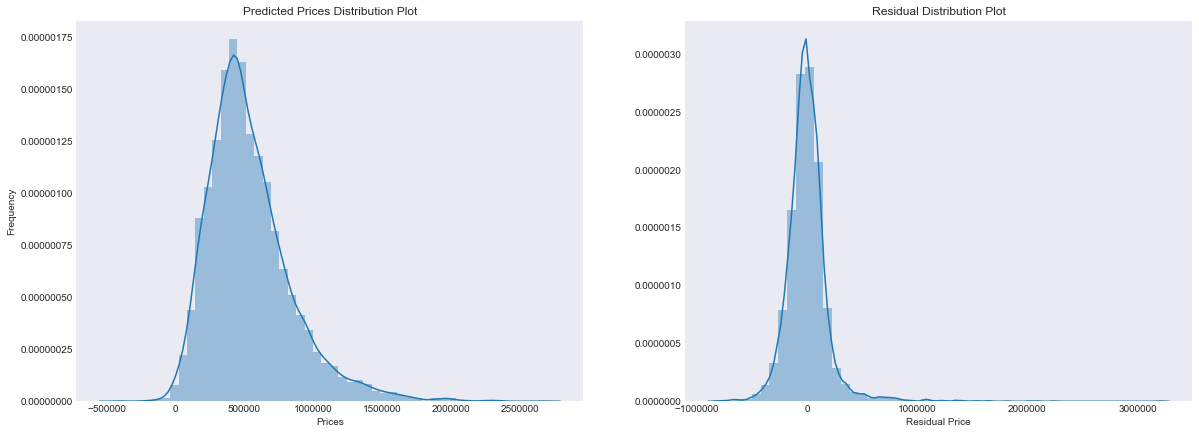

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
fig.set_size_inches(20, 7)
_ = sns.distplot(price_predict, ax = ax1)
_ = ax1.set_xlabel('Prices')
_ = ax1.set_ylabel('Frequency')
_ = ax1.set_title ('Predicted Prices Distribution Plot')

_ = sns.distplot((price_actual-price_predict), ax=ax2)
_ = ax2.set_xlabel('Residual Price')
_ = ax2.set_title ('Residual Distribution Plot')

**There appears that predicted price is normally distributed but skewed to the right.**

#### Residual Distribution Plot

Residuals are different from the actual values and the predicted values. If you are a normally distributed residuals, it is a good sign that your model is correct choise for the data. If it is not normally distributed than we must go back and check whether Linear Regression model is a good choise for the data set or not.

Regression Evaluation Matrix

Mean Absolute Error : Mean of the absolute value of the errors, it is the easiest to understand

Mean Squared Error : Mean of the squared errors, more popular than MAE because MSE punishes larger errors which tends to be useful in the real world.

Root Mean Squared Error : Square root of the mean of the squared errors. More popular than MSE since RMSE is interpretable in the 'y' units.

#### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">R-Squared, F-statistics and P-value Calculation of Some Fundamental Features

#### Sqft Leaving vs. Price

In [28]:
X = df.sqft_living
y = df.price


lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),y)
lm.predict(X.values.reshape(-1,1))
r2 = lm.score(X.values.reshape(-1,1), y)
f_stat = (r2)/(1-r2)
p_val = stats.f.cdf(f_stat, len(X)-1, len(y)-1)
print("r-squared value:",r2)
print("f-statistic:",f_stat)
print("p-value:",p_val)

r-squared value: 0.492881628836
f-statistic: 0.971926194873
p-value: 0.0181754780851


#### Bedrooms vs. Price

In [29]:
X = df.bedrooms
y = df.price

lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),y)
lm.predict(X.values.reshape(-1,1))
r2 = lm.score(X.values.reshape(-1,1), y)
f_stat = (r2)/(1-r2)
p_val = stats.f.cdf(f_stat, len(X)-1, len(y)-1)
print("r-squared value:",r2)
print("f-statistic:",f_stat)
print("p-value:",p_val)

r-squared value: 0.0998733558174
f-statistic: 0.110954782266
p-value: 0.0


#### Year_Built vs. Price

In [30]:
X = df.yr_built
y = df.price

lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),y)
lm.predict(X.values.reshape(-1,1))
r2 = lm.score(X.values.reshape(-1,1), y)
f_stat = (r2)/(1-r2)
p_val = stats.f.cdf(f_stat, len(X)-1, len(y)-1)
print("r-squared value:",r2)
print("f-statistic:",f_stat)
print("p-value:",p_val)

r-squared value: 0.00291524695292
f-statistic: 0.00292377046587
p-value: 0.0


#### Bathrooms vs. Price

In [31]:
X = df.bathrooms
y = df.price

lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),y)
lm.predict(X.values.reshape(-1,1))
r2 = lm.score(X.values.reshape(-1,1), y)
f_stat = (r2)/(1-r2)
p_val = stats.f.cdf(f_stat, len(X)-1, len(y)-1)
print("r-squared value:",r2)
print("f-statistic:",f_stat)
print("p-value:",p_val)

r-squared value: 0.275775852902
f-statistic: 0.380787983951
p-value: 0.0


#### Condition vs. Price

In [32]:
X = df.condition
y = df.price

lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),y)
lm.predict(X.values.reshape(-1,1))
r2 = lm.score(X.values.reshape(-1,1), y)
f_stat = (r2)/(1-r2)
p_val = stats.f.cdf(f_stat, len(X)-1, len(y)-1)
print("r-squared value:",r2)
print("f-statistic:",f_stat)
print("p-value:",p_val)

r-squared value: 0.00132250625947
f-statistic: 0.00132425759843
p-value: 0.0


In [33]:
from sklearn import metrics

### Mean Absolute Error

In [34]:
metrics.mean_absolute_error(price_actual, price_predict)

125403.44781413638

### Mean Squared Error

In [35]:
metrics.mean_squared_error(price_actual, price_predict)

39270322218.99012

### Square Root Mean Squared Error

In [36]:
np.sqrt(metrics.mean_squared_error(price_actual, price_predict))

198167.40957834141

## <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;">StatsModel

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [38]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + basement + yr_built + renovated + zipcode + lat + long+ sqft_living15 + sqft_lot15', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2801.
Date:                Mon, 20 Aug 2018   Prob (F-statistic):               0.00
Time:                        21:17:53   Log-Likelihood:            -2.9459e+05
No. Observations:               21612   AIC:                         5.892e+05
Df Residuals:                   21593   BIC:                         5.894e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.745e+06   2.95e+06      2.288

## <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Fitted vs. Residual Plot

Text(0.5,1,'Fitted vs Residual')

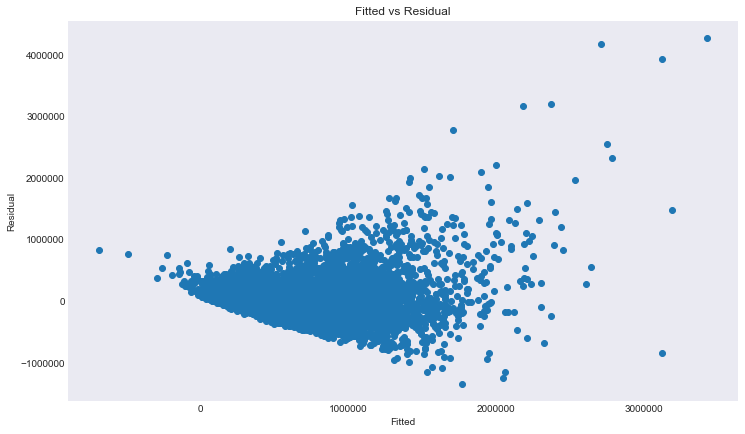

In [39]:
plt.figure(figsize = (12,7))
price1 = df.price
fitted = ols(formula='price1 ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + yr_built + renovated + zipcode + sqft_living15 + sqft_lot15', data=df).fit()
#print (fitted.summary())
plt.scatter(fitted.fittedvalues, fitted.resid)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')

## <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Q-Q Plot

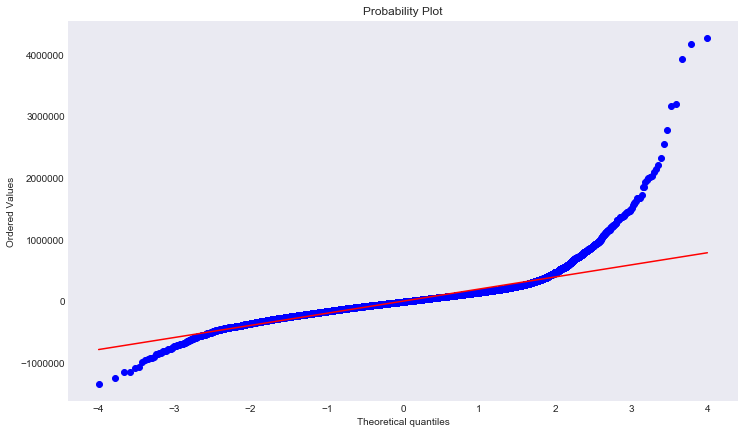

In [40]:
plt.figure(figsize = (12,7))
stats.probplot(fitted.resid, dist="norm", plot=pylab)
pylab.show()

## <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Leverage Plot

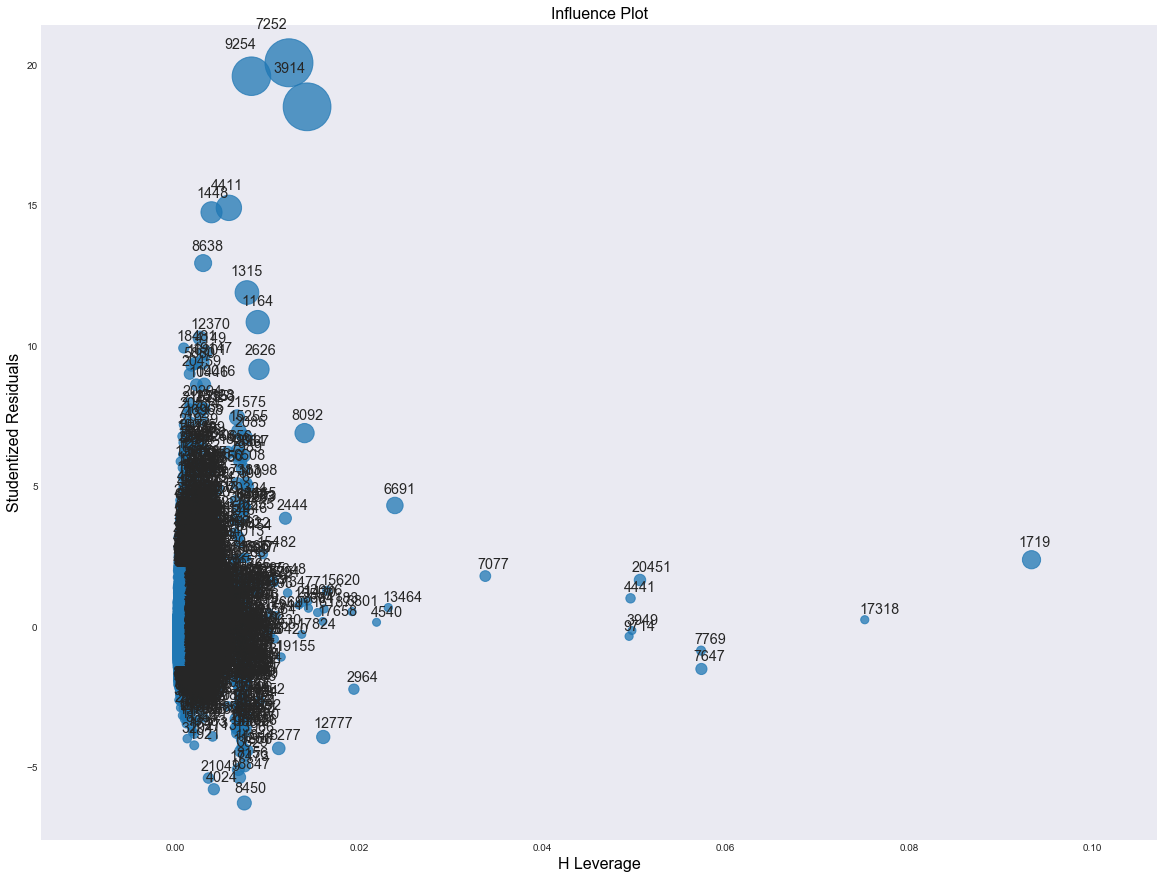

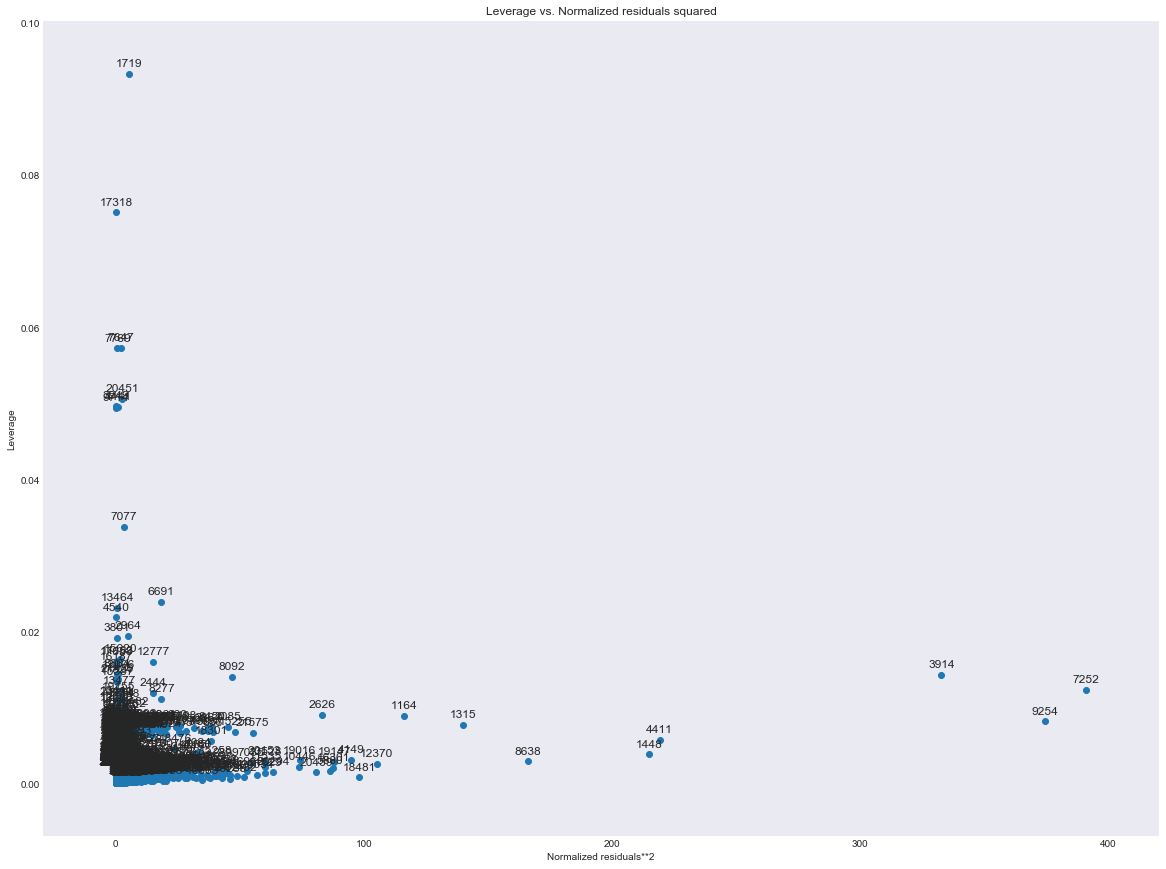

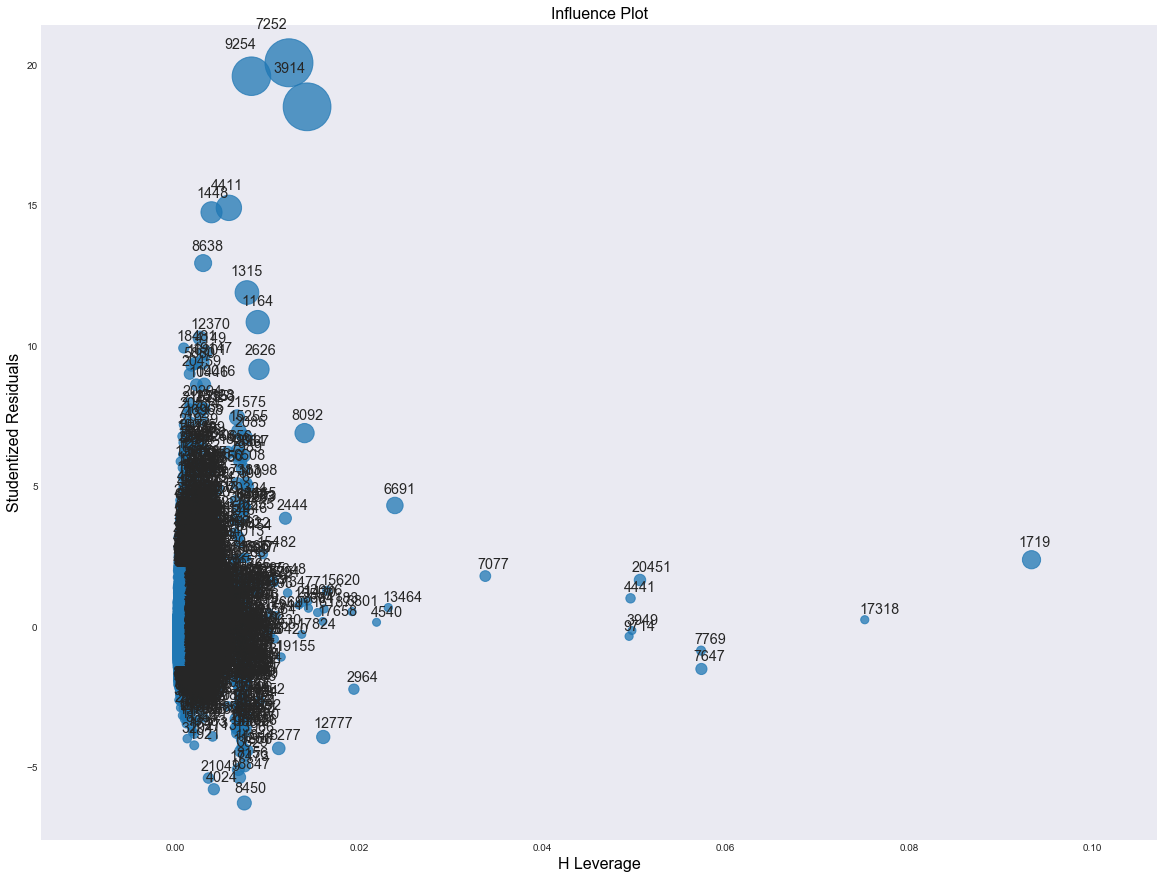

In [41]:
plt.rcParams["figure.figsize"] = (20,15)
plot_leverage_resid2(fitted)
influence_plot(fitted, size = 48)

## <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Dropping the outliers and Applying the Statsmodel Again

In [42]:
df_new = df.drop([8450,4024,21049,12777,2964,7077,3949,9714,7769,7647,17318,1719,2444,6691,8092,4540,13464,2626,1164,
                 1315,8638,1448,4411,9254,7252,3914,20451,4441,10446,19016,20459,21575,15255,19147,18481,4149,12370,
                 16187,3801,17824,21430,13006,11183,17658,8277,20420,13630,17348,15557,2899,16301,5880,2085,18301])

model = sm.OLS(df_new.price, df_new[['bedrooms','bathrooms','sqft_living', 
       'floors', 'waterfront', 'view', u'condition', 'grade','sqft_above','basement', 
       'yr_built', 'renovated', 'zipcode', 'lat','long','sqft_living15']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.490e+04
Date:                Mon, 20 Aug 2018   Prob (F-statistic):               0.00
Time:                        21:39:41   Log-Likelihood:            -2.9176e+05
No. Observations:               21558   AIC:                         5.835e+05
Df Residuals:                   21542   BIC:                         5.837e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.889e+04   1798.507    -16.066

## <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Leverage Plot

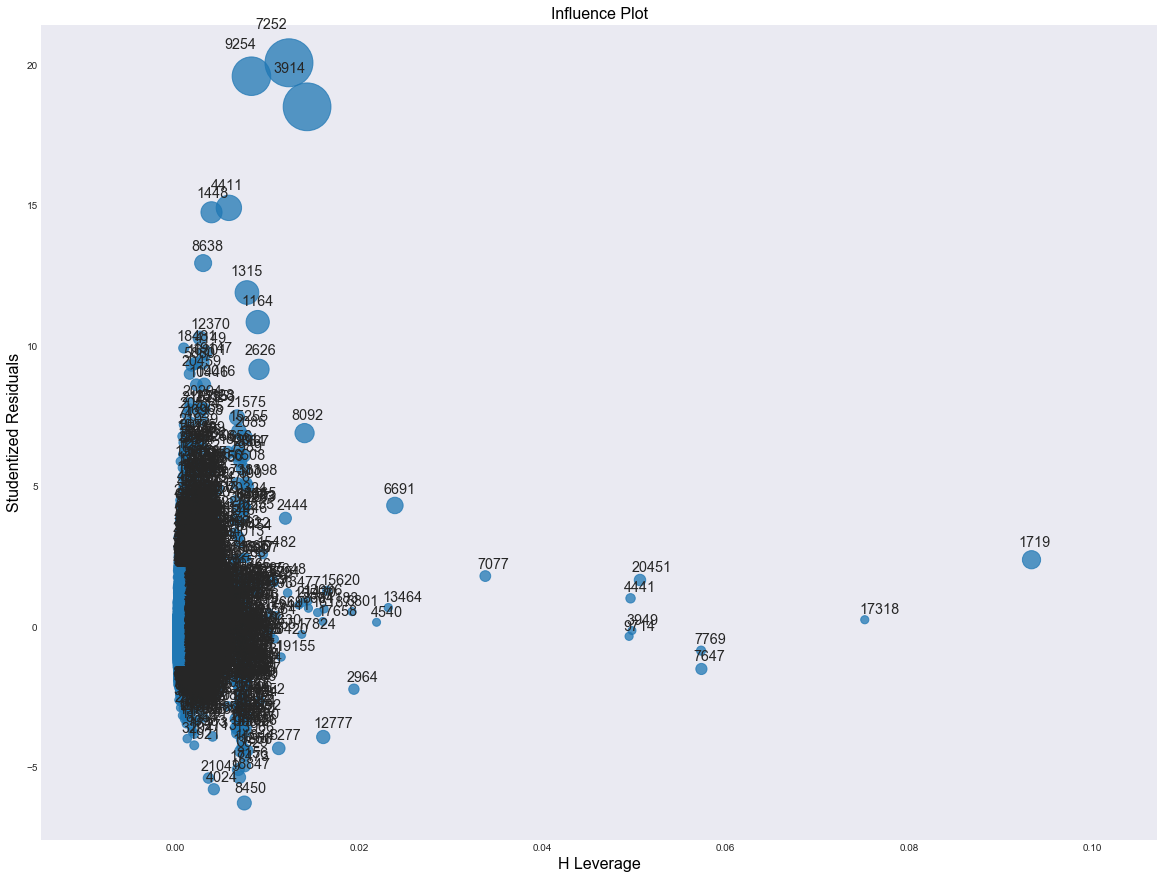

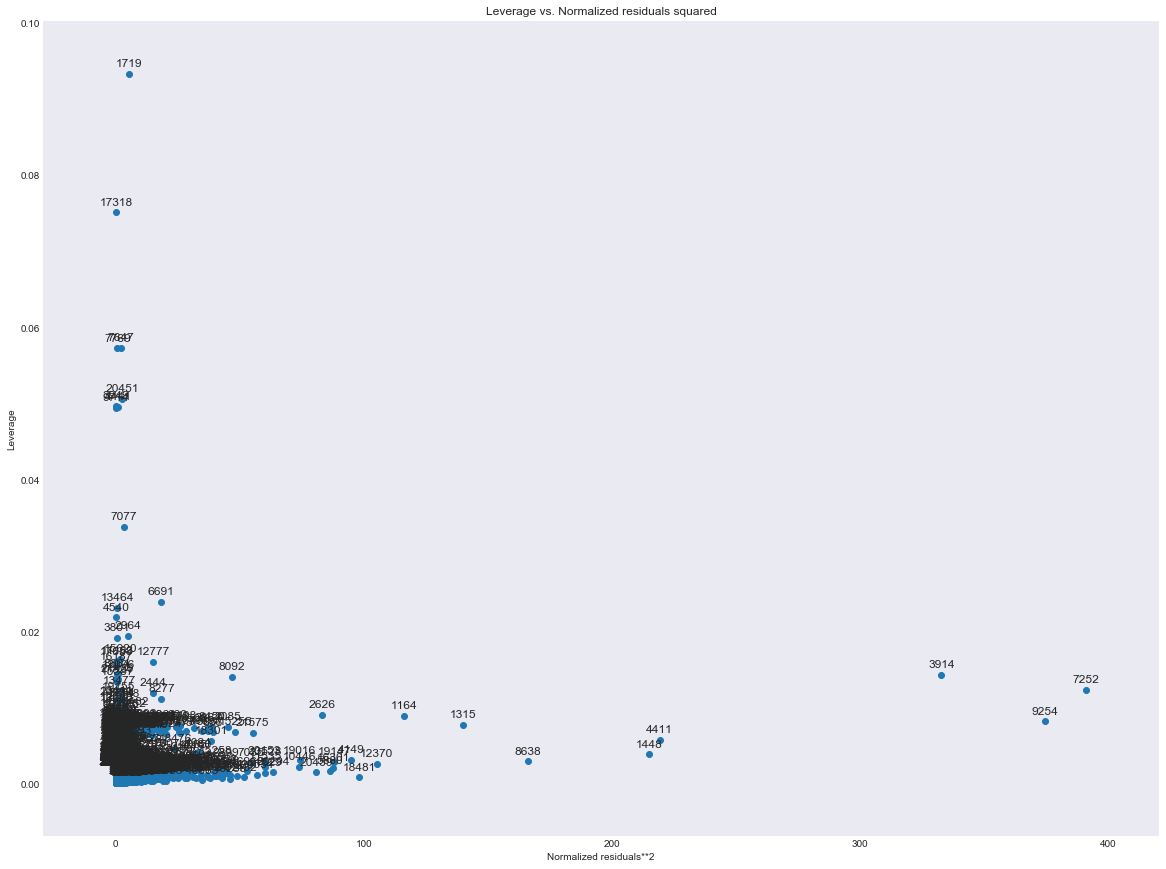

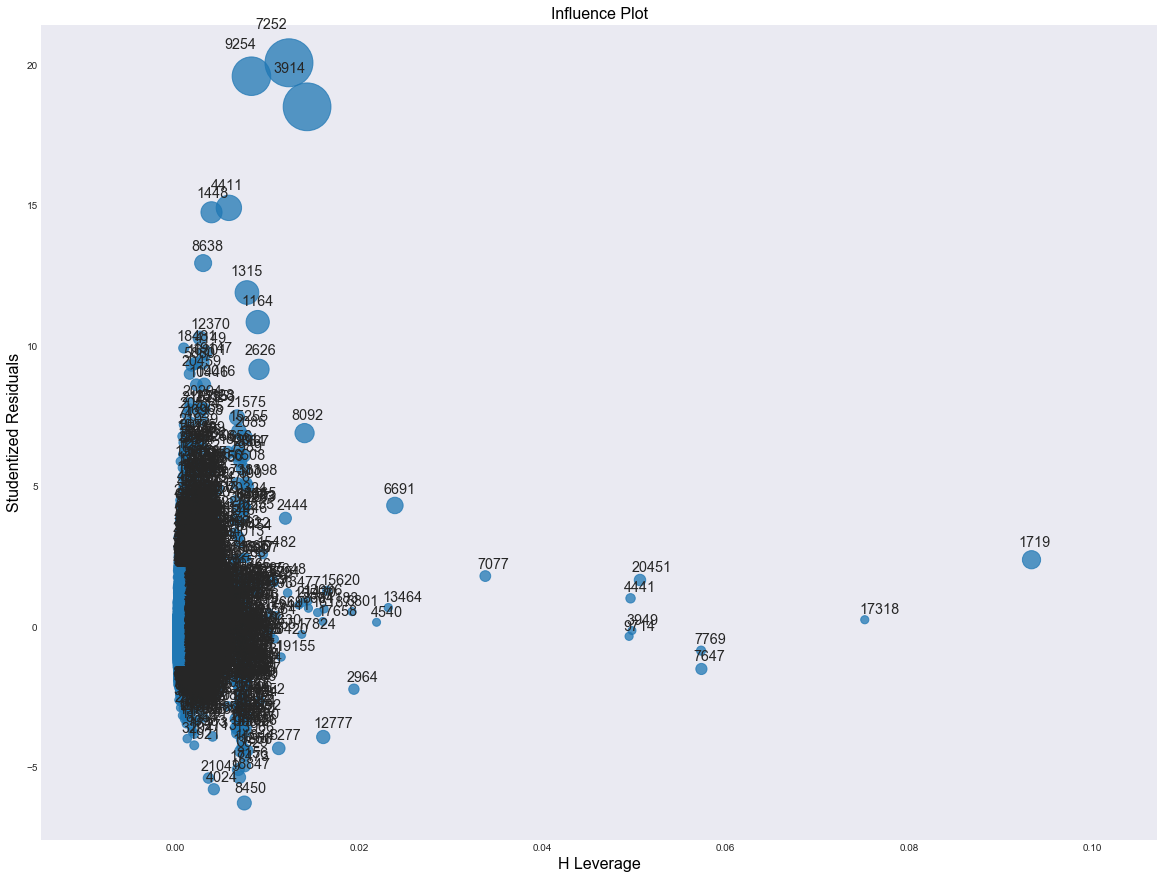

In [43]:
plt.rcParams["figure.figsize"] = (20,15)
plot_leverage_resid2(fitted)
influence_plot(fitted, size = 48)

## <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;"> Training Set StatsModel

In [44]:
m = sm.OLS(y_train, X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'basement', 'yr_built', 'renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']]).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     8488.
Date:                Mon, 20 Aug 2018   Prob (F-statistic):               0.00
Time:                        21:53:26   Log-Likelihood:            -2.2102e+05
No. Observations:               16209   AIC:                         4.421e+05
Df Residuals:                   16191   BIC:                         4.422e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.719e+04   2297.795    -16.185

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;"> Training Set Fitted vs. Residual Scatter Plot

Text(0.5,1,'Fitted vs Residual')

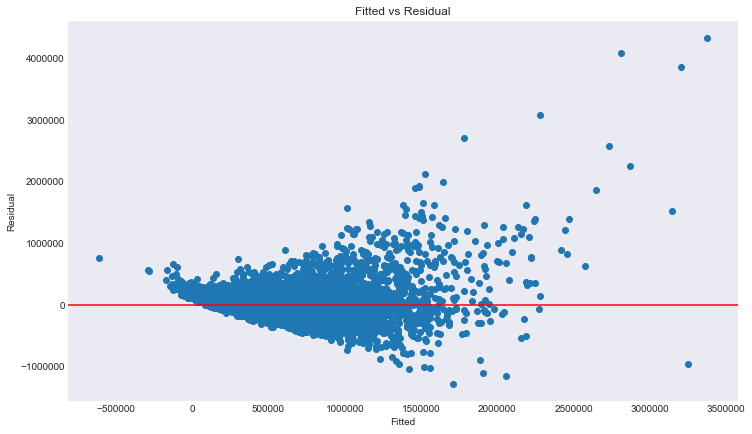

In [45]:
plt.figure(figsize = (12,7))
fitted = sm.OLS(y_train, X_train[['bedrooms','bathrooms','sqft_living', 
       'floors', 'waterfront', 'view', u'condition', 'grade','sqft_above','basement', 
       'yr_built', 'renovated', 'zipcode', 'lat','long','sqft_living15']]).fit()
#print (fitted.summary())
plt.scatter(fitted.fittedvalues, fitted.resid)
plt.axhline(0, color='red')
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;"> Training Set Fitted Q-Q Plot

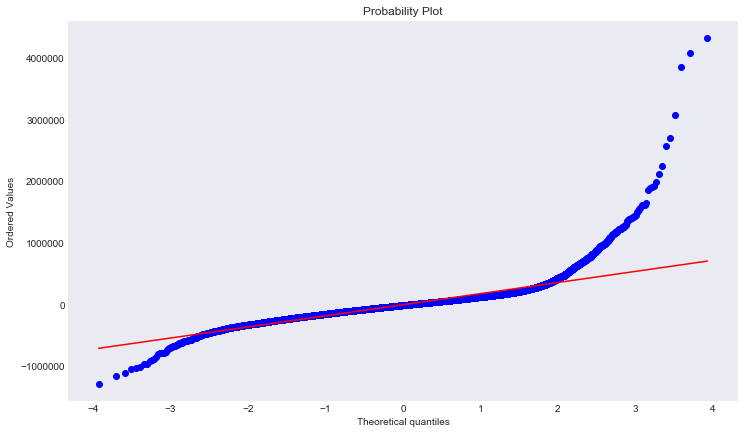

In [46]:
plt.figure(figsize = (12,7))
stats.probplot(fitted.resid, dist="norm", plot=pylab)
pylab.show()

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;"> Training Set Leverage Plot

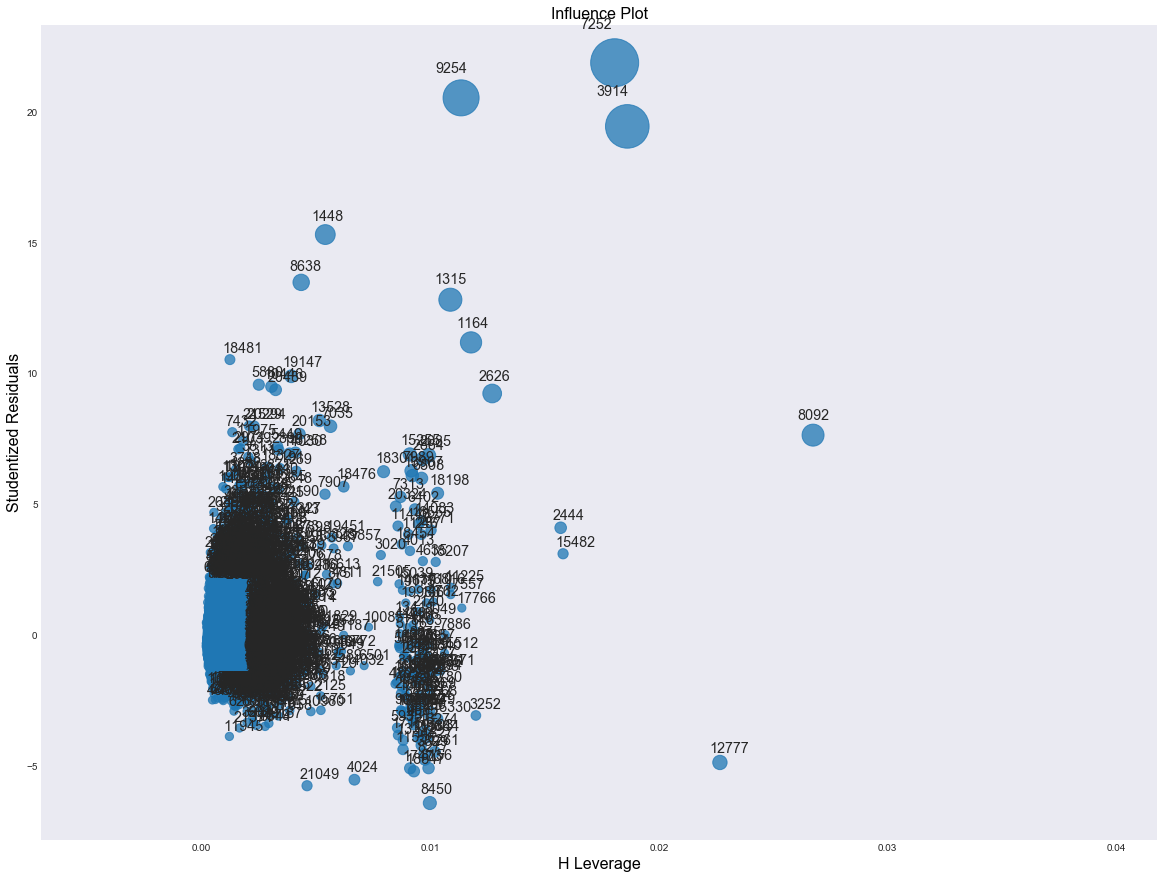

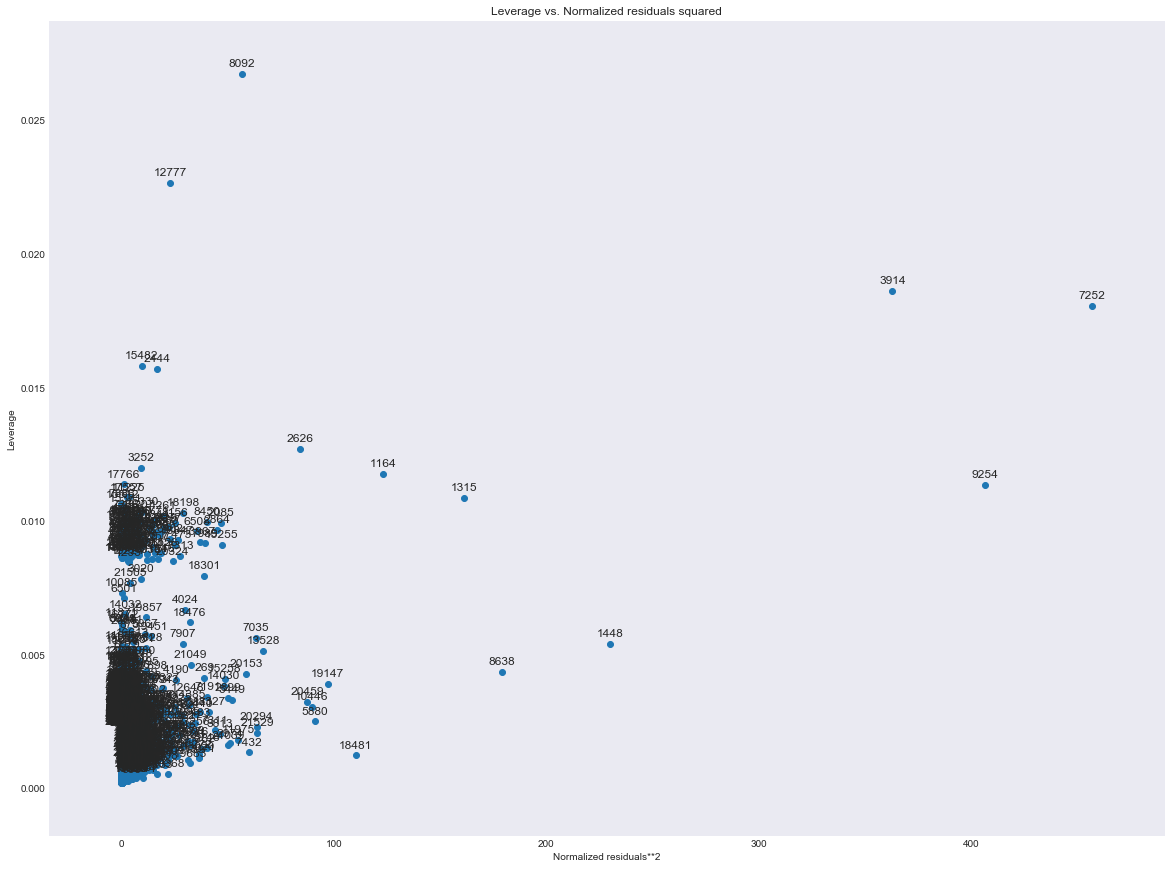

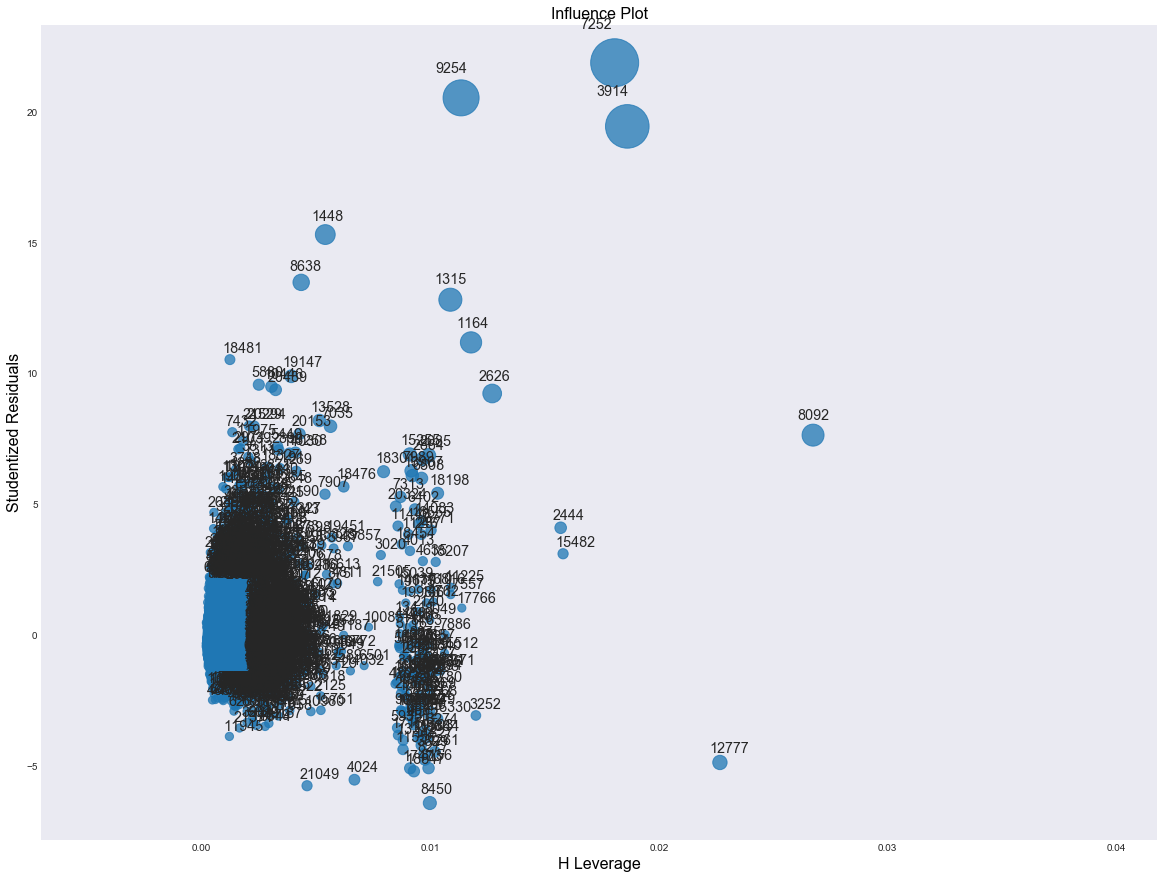

In [47]:
plt.rcParams["figure.figsize"] = (20,15)
plot_leverage_resid2(fitted)
influence_plot(fitted, size = 48)

# <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;"> Predicting With the Test Set

In [48]:
ypred = m.predict(X_test)

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.70731219430830405

## r2 manually

In [50]:
y_pred = m.predict(X_test)
res = y_test - y_pred

ss_tot = np.sum( (y_test - y_test.mean())**2 )
ss_res = np.sum( (y_test - y_pred)**2 )

r2 = (1 - ss_res/ss_tot)
print(r2)

0.707312194308304


# Dropping the Outliers and 2 Features of Which p-value is bigger than 0.05

In [51]:
X_traind = X_train.drop([7252,9254,3914,1448,8638,1315,1164,2626,18481,19147,8092,2444,15482,12777,21049,4024,8450,3252,18301,20459,7035])
y_traind = y_train.drop([7252,9254,3914,1448,8638,1315,1164,2626,18481,19147,8092,2444,15482,12777,21049,4024,8450,3252,18301,20459,7035])
m = sm.OLS(y_train, X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']]).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     9548.
Date:                Mon, 20 Aug 2018   Prob (F-statistic):               0.00
Time:                        22:04:38   Log-Likelihood:            -2.2102e+05
No. Observations:               16209   AIC:                         4.421e+05
Df Residuals:                   16193   BIC:                         4.422e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.724e+04   2296.194    -16.219

In [52]:
X_testd = X_test.drop(['basement', 'floors'], axis = 1)
ypred = m.predict(X_testd)
#y_testd.shape
r2_score(y_test, ypred)

0.70725361238958695

** After applying the outliers and the features of which p-values are more than 0.005, we got almost the same score.**

Text(0.5,1,'Actual & Predicted Price')

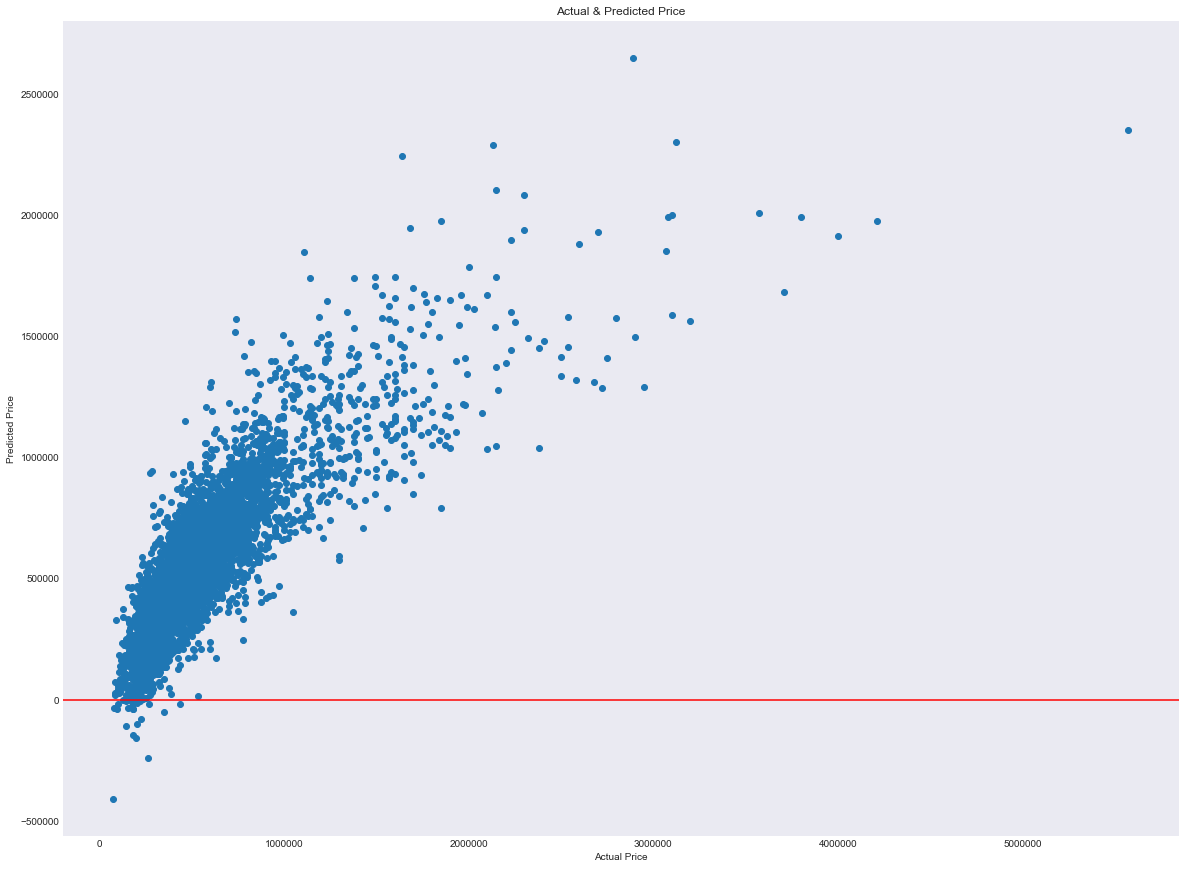

In [53]:
ypred = m.predict(X_testd)
#print(ypred)
plt.scatter(y_test, ypred)
plt.axhline(0, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual & Predicted Price')

## <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;">Random Forest Regressor

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Random Forest Regressor with Grid Search CV

In [54]:
param_grid = {"n_estimators": [50, 200, 500],
            "max_features": [3, 5, 10, 15],
            "min_samples_leaf": [1, 3, 5],
            'random_state': [5]}
model = RandomForestRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv = 5)
grid.fit(X_scaled, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.871368482357
{'max_features': 10, 'min_samples_leaf': 1, 'n_estimators': 500, 'random_state': 5}


### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Random Forest Regressor Application 

In [55]:
reg = RandomForestRegressor(random_state=5, n_estimators=500, max_features=10, 
                                  min_samples_leaf=1)
reg.fit(X_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=5,
           verbose=0, warm_start=False)

In [56]:
reg.score(X_test_scaled, y_test)

0.88397383347963165

In [57]:
y_pred = reg.predict(X_test_scaled)

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Actual vs. Predicted Price (Np.log)

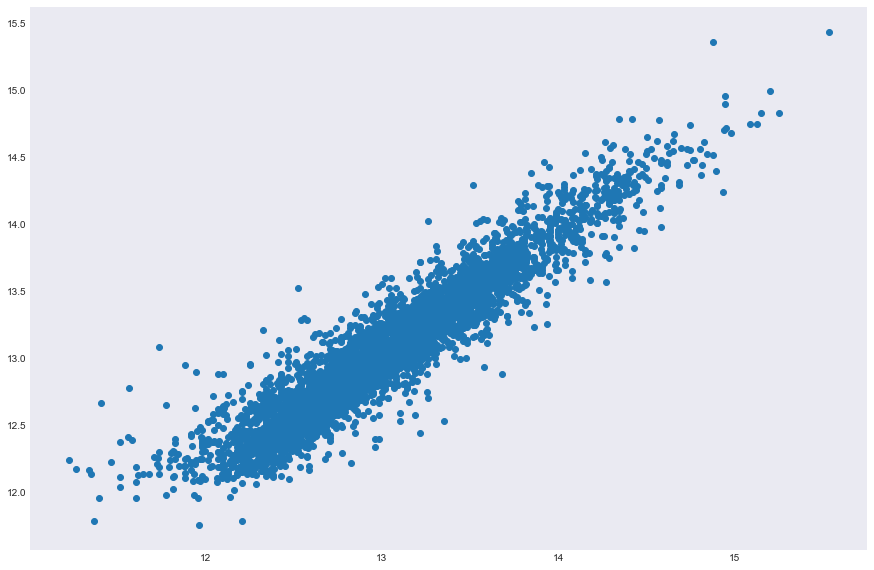

In [58]:
plt.rcParams["figure.figsize"] = (15,10)
plt.scatter(x=np.log(y_test), y=np.log(y_pred))
plt.show()

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Feature Importance Calculation

In [59]:
feature_import = pd.DataFrame(data=reg.feature_importances_, index=X_scaled.columns.values, columns=['values'])
feature_import.sort_values(['values'], ascending=False, inplace=True)
feature_import.transpose()

,grade,sqft_living,lat,long,sqft_living15,sqft_above,yr_built,waterfront,zipcode,bathrooms,view,sqft_lot,sqft_lot15,bedrooms,condition,floors,basement,renovated
values,0.267442,0.250286,0.145241,0.062078,0.058757,0.051073,0.037479,0.02518,0.019145,0.018919,0.018858,0.015652,0.015097,0.004128,0.003564,0.002863,0.002248,0.001991


### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Feature Importance Plot

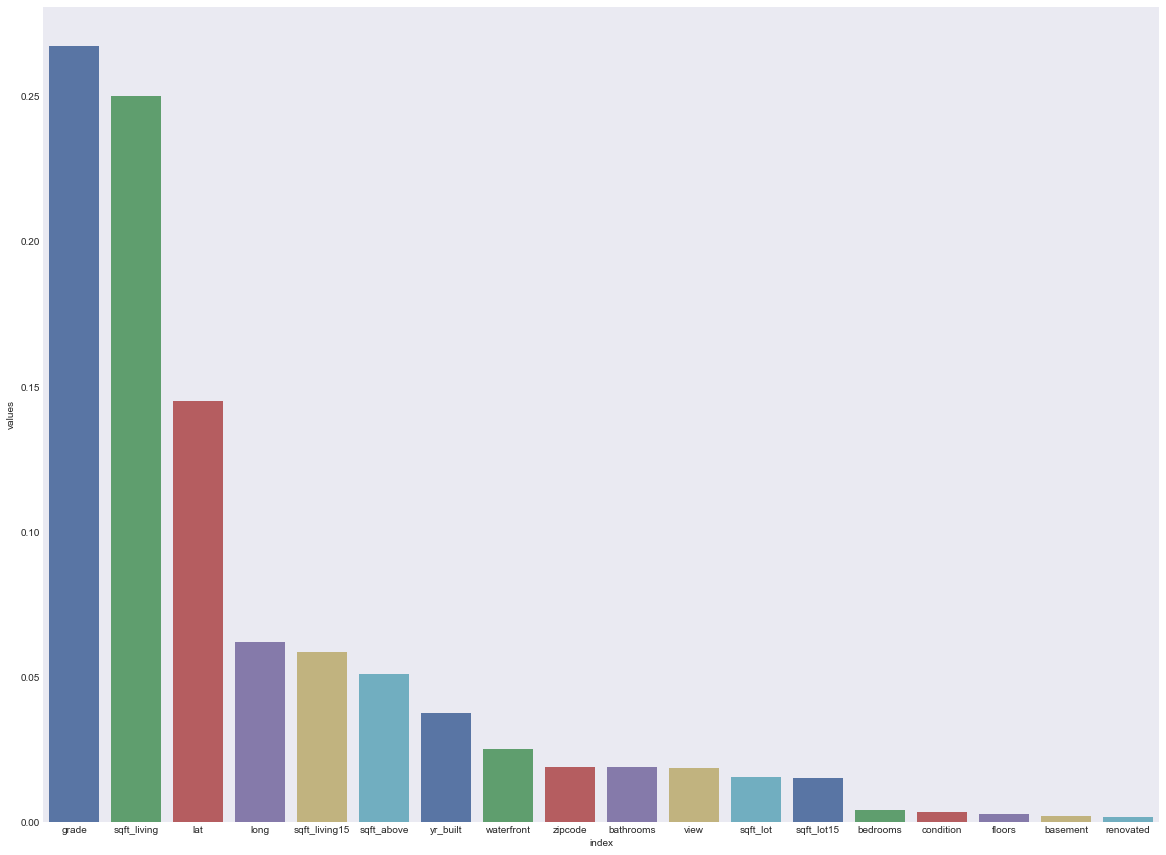

In [60]:
plt.rcParams["figure.figsize"] = (20,15)
feature_import.reset_index(level=0, inplace=True)
sns.barplot(x='index', y='values', data=feature_import, palette='deep')
plt.show()

### After dropping off the rows extracted from Statsmodel and the least important features from the Random Forest Regressor, We will apply Random Forest again.  

In [61]:
df_nnew = df.drop(([4441,20451,12370,4149,18481,19147,20459,19016,10446,21575,2085,20459,19016,10446,15255,
                     2085,16187,3081,8277,6508,15482,17784,17348,20420,13630,21430,8450,4024,21049,12777,2964,7077,
                     3949,9714,7769,7647,17318,1719,2444,6691,8092,4540,13464,2626,1164,
                     1315,8638,1448,4411,9254,7252,3914]), axis = 0)
X_new = df_nnew[['bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade',
                 'basement', 'yr_built', 'zipcode', 'long', 'sqft_lot15','bedrooms',
                 'renovated', 'condition', 'floors']]
y_new = df.drop(([4441,20451,12370,4149,18481,19147,20459,19016,10446,21575,2085,20459,19016,10446,15255,
                     2085,16187,3081,8277,6508,15482,17784,17348,20420,13630,21430,8450,4024,21049,12777,2964,7077,
                     3949,9714,7769,7647,17318,1719,2444,6691,8092,4540,13464,2626,1164,
                     1315,8638,1448,4411,9254,7252,3914]), axis = 0).price

### Splitting the data set into training and testing data sets 

In [62]:
X_trainr, X_testr, y_trainr, y_testr = train_test_split(X_new, y_new, test_size = 0.25, random_state=5)

### Scaling the Train and Test Independent Variables after dropping the categorical values.

In [63]:
Xr_scaled = X_trainr.drop(['waterfront','view', 'basement', 'renovated'], axis=1)
Xr_scaled = pd.DataFrame(sc.fit_transform(Xr_scaled), 
                        columns=Xr_scaled.columns.values,
                        index=Xr_scaled.index)


Xr_scaled[['waterfront','view', 'basement', 'renovated']] = X_trainr[['waterfront','view', 'basement', 'renovated']]


Xr_test_scaled = X_testr.drop(['waterfront','view', 'basement', 'renovated'], axis=1)
Xr_test_scaled = pd.DataFrame(sc.transform(Xr_test_scaled), 
                        columns=Xr_test_scaled.columns.values,
                        index=Xr_test_scaled.index)

Xr_test_scaled[['waterfront','view', 'basement', 'renovated']] = X_testr[['waterfront','view', 'basement', 'renovated']]


In [64]:
param_grid = {"n_estimators": [50, 200, 500],
            "max_features": [3, 5, 10, 15],
            "min_samples_leaf": [1, 3, 5],
            'random_state': [5]}
model = RandomForestRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv = 5)
grid.fit(Xr_scaled, y_trainr)

print(grid.best_score_)
print(grid.best_params_)

0.823903276287
{'max_features': 10, 'min_samples_leaf': 1, 'n_estimators': 500, 'random_state': 5}


In [65]:
reg = RandomForestRegressor(random_state=5, n_estimators=500, max_depth=8, max_features=10, 
                                  min_samples_leaf=1)
reg.fit(Xr_scaled, y_trainr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=5,
           verbose=0, warm_start=False)

In [66]:
reg.score(Xr_test_scaled, y_testr)

0.77804568727908252

## <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;">Support Vector Regressor

In [67]:
mdel = SVR()
mdel.get_params(deep=True)

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Support Vector Machine Grid Search CV Best Parameters

In [68]:
parameters = {'kernel':['linear', 'rbf', 'poly','sigmoid'], 
              'C': [0.01, 0.1, 1, 10], 
              'epsilon': [0.01,0.1,1,10],
              }

model = SVR()
grid = GridSearchCV(estimator=model, param_grid=parameters, cv = 5)
grid.fit(X_scaled, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.433053175621
{'C': 10, 'epsilon': 10, 'kernel': 'linear'}


### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Support Vector Machine

In [69]:
regr = SVR(epsilon= 10, C= 10, kernel= 'linear')
regr.fit(X_scaled, y_train)
predictions = regr.predict(X_test)
print(regr.coef_)
print('--------------------')
print(regr.intercept_)
print('--------------------')
print(regr.predict(X_test_scaled))
print('--------------------')
print ('SVR Score: {}'.format(regr.score(X_test_scaled, y_test)))

[[  4345.4895174   19439.22919971  33737.09093831   6193.69124351
   11405.02456422  10528.09375896  42487.51572192  25705.92031192
  -18835.28351396   3853.58929899  48899.73925988  -3240.7454896
   31652.63592296   3159.68369448   1080.          19040.          10232.27527006
    2590.        ]]
--------------------
[ 472059.11248019]
--------------------
[ 391607.77487187  295038.75124245  432639.11474003 ...,  429686.97657131
  339715.02076574  603567.24801521]
--------------------
SVR Score: 0.47498043363149545


**With the SVM Regressor, we got 0.47 as a best score**

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Recursive Feature Elimination

In [70]:
regr = SVR(epsilon= 10, C= 10, kernel= 'linear')
# create the RFE model for the svr classifier 
# and select attributes
rfe = RFE(regr,15)
rfe = rfe.fit(X_scaled, y_train)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)
print (X_scaled.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False False  True  True False]
[1 1 1 1 1 1 1 1 1 1 1 1 1 2 4 1 1 3]
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront', 'view', 'basement', 'renovated'], dtype='object')


**renovated, waterfront and sqft_lot15 features are going to be eliminated.**

In [71]:
X_scaled1 = X_scaled.drop(['renovated','waterfront','sqft_lot15'], axis = 1)
X_test_scaled1 = X_test_scaled.drop(['renovated','waterfront','sqft_lot15'], axis = 1)

In [72]:
regr = SVR(epsilon= 0.01, C= 10, tol= 0.001,kernel= 'linear')

regr.fit(X_scaled1, y_train)

predictions = regr.predict(X_test_scaled1)

print(regr.coef_)
print('--------------------')
print(regr.intercept_)
print('--------------------')
print(regr.predict(X_test_scaled1))
print('--------------------')
print ('SVR Score: {}'.format(regr.score(X_test_scaled1, y_test)))

[[  4258.00424681  19535.40803257  33866.98162084   7337.20310151
   11357.0395068   10600.22675684  42606.91336436  25780.33413196
  -18941.26958582   3789.66503685  48786.14174496  -3140.10996312
   31894.92461409  19186.53671617  10287.50505078]]
--------------------
[ 472250.09289549]
--------------------
[ 391673.85347633  295040.14178691  432345.46095962 ...,  430433.08491616
  339775.2413893   604556.99092368]
--------------------
SVR Score: 0.47548748522915163


**Despite we eliminated the least important features, our Support Vector Regressor Algorithm did not give a better score.**

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Linear SVR with the GridSearch CV

In [73]:
from sklearn.svm import LinearSVR
estimator = LinearSVR(loss="squared_epsilon_insensitive",
            dual=False,
            random_state=5)
tuned_parameters = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
                    'epsilon': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5]}

gridsearch = GridSearchCV(estimator,
                        tuned_parameters,
                        scoring="r2",
                        n_jobs=-1,
                        cv=7,
                        verbose=0)
gridsearch.fit(X_scaled1, y_train)
_hyper_C = gridsearch.best_params_
_hyper_epsilon = gridsearch.best_params_
_best_clf_score = gridsearch.best_score_

_clf = best_clf = gridsearch.best_estimator_
_coef = best_clf.coef_
_bias = -best_clf.intercept_[0]
_L1 = np.linalg.norm(_coef, ord=1)
prediction = best_clf.predict(X_test_scaled1)
_loss = np.sum(np.abs(y_test - prediction))
print (_clf)
print ('\n')
print (_coef)
print ('\n')
print (_bias)
print ('\n')
print (_L1)
print ('\n')
print (_loss)
print (_best_clf_score)

LinearSVR(C=0.1, dual=False, epsilon=0.1, fit_intercept=True,
     intercept_scaling=1.0, loss='squared_epsilon_insensitive',
     max_iter=1000, random_state=5, tol=0.0001, verbose=0)


[ -36982.25924197   32515.95584757  145124.76472838   -2662.1669769
    5279.96359025   15419.21915879  109545.23097588   25940.79785724
  -82530.11957819  -31681.26229301   82367.93398573  -31914.62434852
   12099.54561454   80152.54371637   -6571.9612336 ]


-523205.498431


700788.349147


691210468.3443804
0.679012150468


**With the new parameters we got 0.67 as a best_score**

In [74]:
regr = LinearSVR(C=0.1, dual=False, epsilon=2, fit_intercept=True,
     intercept_scaling=1.0, loss='squared_epsilon_insensitive',
     max_iter=1000, random_state=5, tol=0.0001, verbose=0)
regr.fit(X_scaled1, y_train)
predictions = regr.predict(X_test_scaled1)
print(regr.coef_)
print(regr.intercept_)
print(regr.predict(X_test_scaled1))
print (regr.score(X_test_scaled1, y_test))

[ -36976.40834608   32516.1246027   145119.0215595    -2666.16632748
    5284.49068101   15423.02237814  109552.83825646   25930.98856175
  -82529.50350301  -31679.68732424   82358.32571834  -31917.46802067
   12105.17971388   80153.66878241   -6576.48636812]
[ 523207.4585547]
[ 340753.6732912    95503.20830518  444454.68415293 ...,  434912.63847047
  387859.18273503  778430.9798191 ]
0.692357904981


**Applying the Hyper Parameters we got 0.69 as best score**

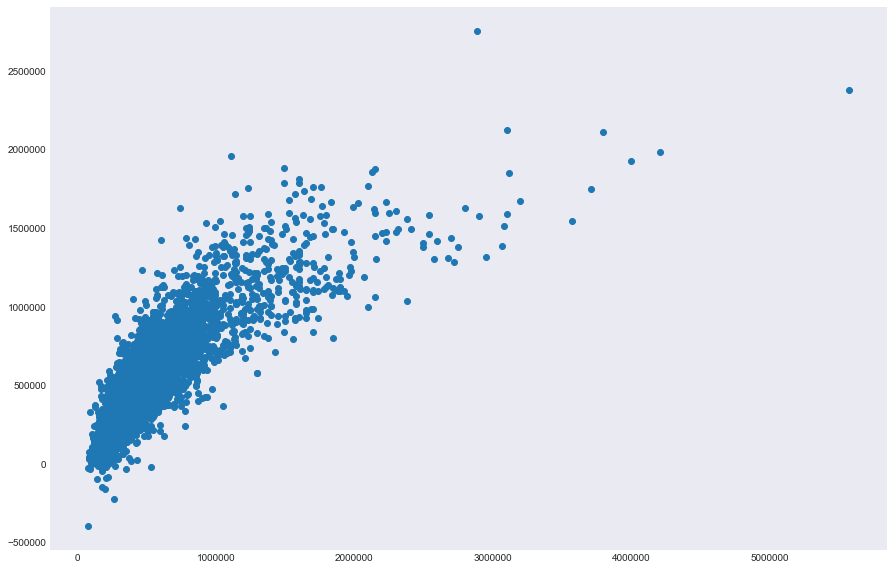

In [75]:
plt.rcParams["figure.figsize"] = (15,10)
plt.scatter(x=y_test, y=regr.predict(X_test_scaled1))
plt.show()

## <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;">Gradient Boosting Regressor

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {"n_estimators": [100, 250, 500, 750],
              'learning_rate': [0.08, 0.1, 0.2, 0.3, 1.0],
              'max_depth': [3, 5, 7, 9],
              'max_features':['auto', 5, 10],
              'min_samples_split': [2, 3]
             }

model = GradientBoostingRegressor(random_state=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid.fit(X_scaled, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.898429910647
{'learning_rate': 0.08, 'max_depth': 5, 'max_features': 10, 'min_samples_split': 2, 'n_estimators': 750}


MSE: <function mean_squared_error at 0x000002A74E2D5378>
________________
R square score: 0.9048358869594715


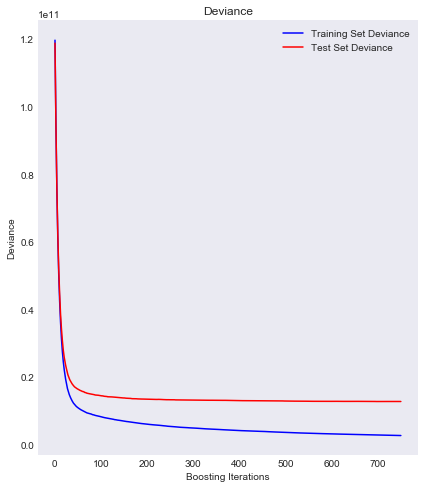

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 750, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.08, 'random_state': 5, 'loss': 'ls'}

clf = GradientBoostingRegressor(**params).fit(X_scaled, y_train)
mean_squared_error(y_test, clf.predict(X_test_scaled))
print ('MSE: {}'.format(mean_squared_error))
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test_scaled)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
print ('________________')
print ('R square score: {}'.format(clf.score(X_test_scaled, y_test)))

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Gradient Boosting Feature Importance 

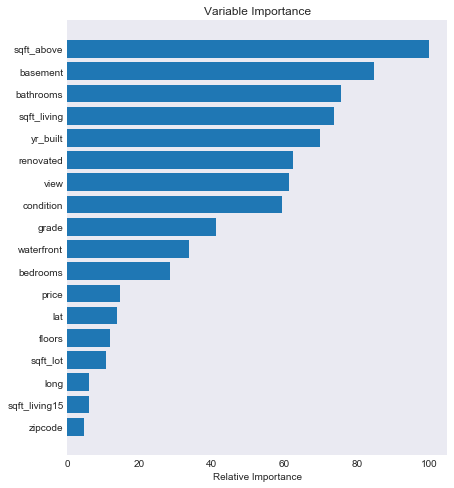

In [80]:
plt.figure(figsize = (15,8))
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;">AdaBoost Regressor

In [81]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {"n_estimators": [50, 100, 250, 500],
              "loss" : ['linear', 'square', 'exponential'],
              'learning_rate': [1.0, 1.5, 2.0]
             }

model = AdaBoostRegressor(random_state=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid.fit(X_scaled, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.428669091158
{'learning_rate': 2.0, 'loss': 'square', 'n_estimators': 100}


**We have got 0.43 as a maximum score**

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Ada Boost Regressor with Hyper Parameters

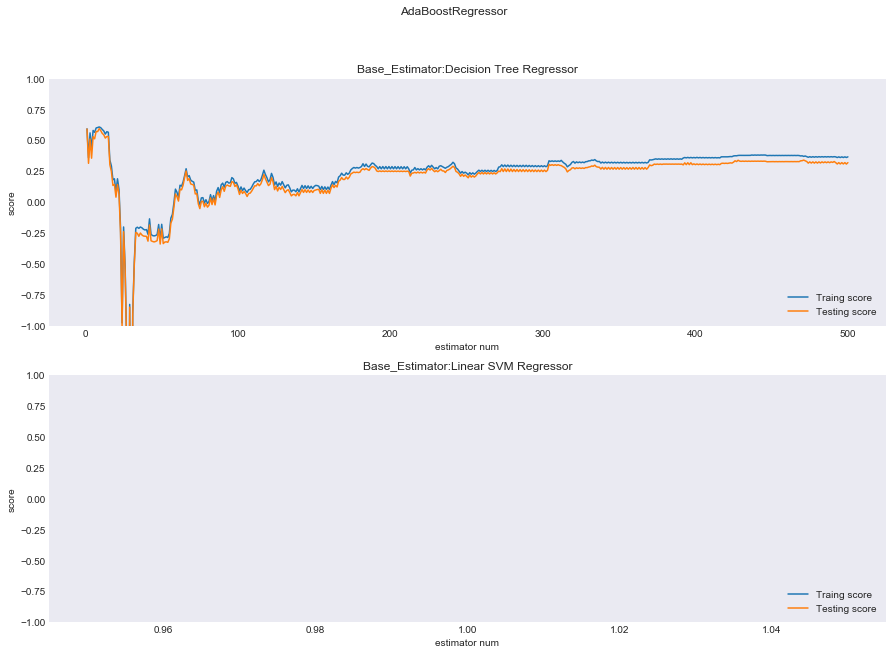

[<generator object BaseWeightBoosting.staged_score at 0x000002A7521FC888>, <generator object BaseWeightBoosting.staged_score at 0x000002A751E6CC50>]


In [82]:
fig=plt.figure()
regrs=[AdaBoostRegressor(n_estimators = 500, loss = 'square', learning_rate = 2.0, random_state =5), 
       AdaBoostRegressor(base_estimator=LinearSVR(), n_estimators = 100, loss = 'square', 
                         learning_rate = 2.0, random_state = 5)]
labels=["Decision Tree Regressor","Linear SVM Regressor"]
scores = []
for i ,regr in enumerate(regrs):
    ax=fig.add_subplot(2,1,i+1)
    regr.fit(X_scaled,y_train)
        ## graph
    estimators_num=len(regr.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(regr.staged_score(X_scaled,y_train)),label="Traing score")
    ax.plot(list(X),list(regr.staged_score(X_test_scaled,y_test)),label="Testing score")
    scores.append(regr.staged_score(X_test_scaled,y_test))
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(-1,1)
    ax.set_title("Base_Estimator:%s"%labels[i])
plt.suptitle("AdaBoostRegressor")
plt.show()
print (scores)

### <p><span style="color: Red; font-family: Babas; font-size: 1.5em;">Ada Boost Regressor with Learning Rates

<Figure size 1080x576 with 0 Axes>

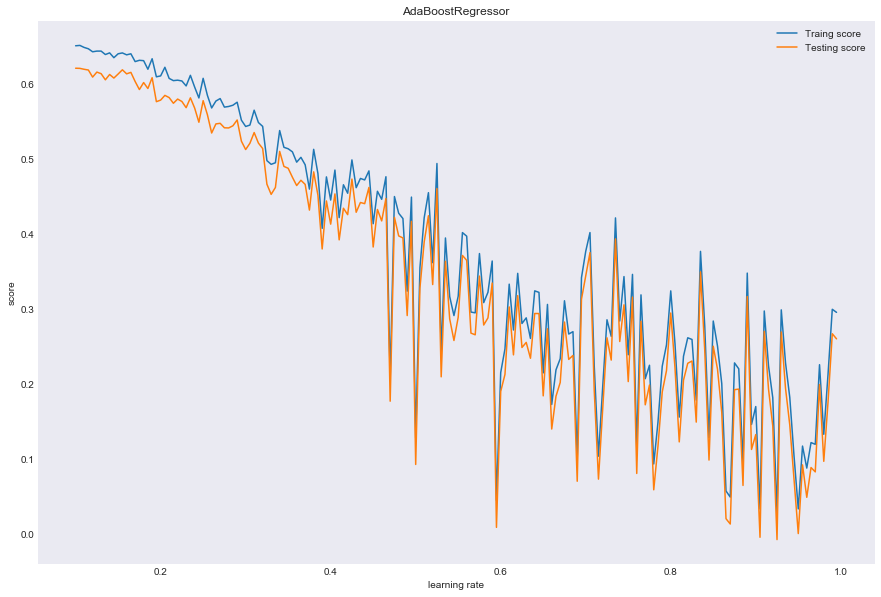

In [83]:
plt.figure(figsize = (15,8))
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
traing_scores=[]
testing_scores=[]
learning_rates = list(np.arange(0.1,1,0.005))
for learning_rate in learning_rates:
    regr=AdaBoostRegressor(n_estimators = 100, loss = 'square', 
                         learning_rate = learning_rate, random_state = 5)
    regr.fit(X_scaled,y_train)
    traing_scores.append(regr.score(X_scaled,y_train))
    testing_scores.append(regr.score(X_test_scaled,y_test))
ax.plot(learning_rates,traing_scores,label="Traing score")
ax.plot(learning_rates,testing_scores,label="Testing score")
ax.set_xlabel("learning rate")
ax.set_ylabel("score")
ax.legend(loc="best")
ax.set_title("AdaBoostRegressor")
plt.show()

# <p><span style="color: Blue; font-family: Babas; font-size: 1.5em;">Heteroskedasticity and Autocorrelation of the Models

In [84]:
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

def model_fit_and_test(X_scaled,y_train,X_scaled_test,y_test):
    def bulid_model(model_name):
        model = model_name()
        return model
    for model_name in [LinearRegression, Ridge, Lasso, ElasticNet, KNeighborsRegressor, DecisionTreeRegressor,
                       SVR, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor]:
    #for model_name in [LinearRegression, ElasticNet]:
        model = bulid_model(model_name)
        model.fit(X_scaled, y_train)
        print ('--------------------------')
        print(model_name)
        resid = model.predict(X_test_scaled) - y_test
        #print resid
        print ('--------------------------')
        print("Residual sum of squares: %f"% np.mean(resid ** 2))
        #print model.predict(TestX)
        #print TestY
        # Explained variance score: 1 is perfect prediction
        plt.scatter(model.predict(X_test_scaled), resid);
        plt.axhline(0, color='red')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        #plt.xlim([1, 50])
        plt.show()
        print ('--------------------------')
        print('R squared: %.2f' % model.score(X_test_scaled, y_test))

        from statsmodels.stats.stattools import jarque_bera
        _, pvalue, _, _ = jarque_bera(resid)
        print ("Test Residuals Normal", pvalue)

        from statsmodels import regression, stats
        import statsmodels.api as sms
        import statsmodels.stats.diagnostic as smd
        # xs_with_constant = sms.add_constant(np.column_stack((X1,X2,X3,X4)))
        xs_with_constant = sms.add_constant(X_test_scaled)
        _, pvalue1, _, _ = stats.diagnostic.het_breushpagan(resid, xs_with_constant)
        print ("Test Heteroskedasticity", pvalue1)
        ljung_box = smd.acorr_ljungbox(resid, lags=10)

        #print "Lagrange Multiplier Statistics:", ljung_box[0]
        print ("Test Autocorrelation P-values:", ljung_box[1])
        if any(ljung_box[1] < 0.05):
            print ("The residuals are autocorrelated.")
        else:
            print ("The residuals are not autocorrelated.") 

--------------------------
<class 'sklearn.linear_model.base.LinearRegression'>
--------------------------
Residual sum of squares: 39270322218.990013


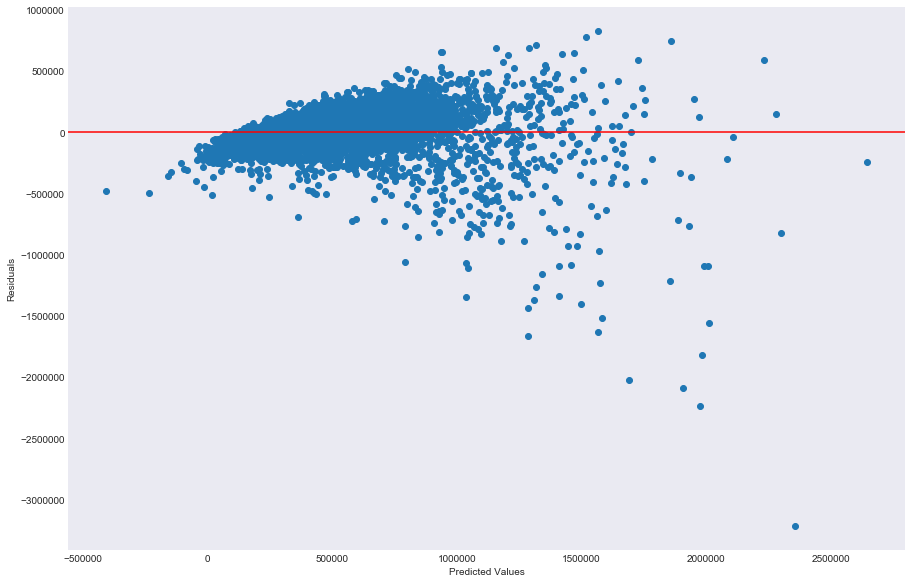

--------------------------
R squared: 0.71
Test Residuals Normal 0.0
Test Heteroskedasticity 4.68837020151e-150
Test Autocorrelation P-values: [ 0.03895355  0.10265723  0.19706037  0.21178738  0.27502304  0.36659723
  0.22531197  0.30307183  0.39349994  0.4039242 ]
The residuals are autocorrelated.
--------------------------
<class 'sklearn.linear_model.ridge.Ridge'>
--------------------------
Residual sum of squares: 39270732305.009247


C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')


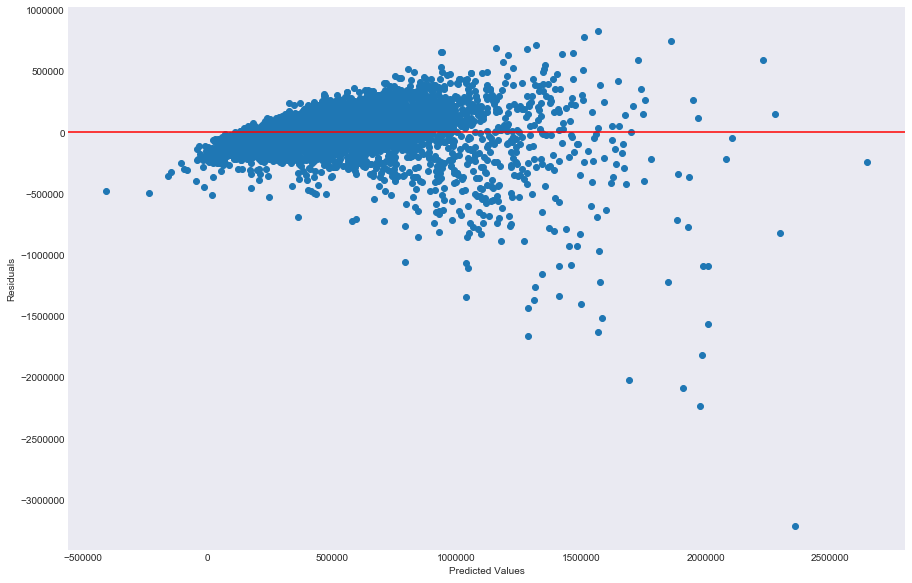

--------------------------
R squared: 0.71
Test Residuals Normal 0.0
Test Heteroskedasticity 4.31862855392e-150
Test Autocorrelation P-values: [ 0.0392208   0.10314676  0.19808111  0.21295655  0.27718066  0.36904273
  0.22739423  0.3055316   0.39622727  0.40712837]
The residuals are autocorrelated.
--------------------------
<class 'sklearn.linear_model.coordinate_descent.Lasso'>
--------------------------
Residual sum of squares: 39270317932.276451


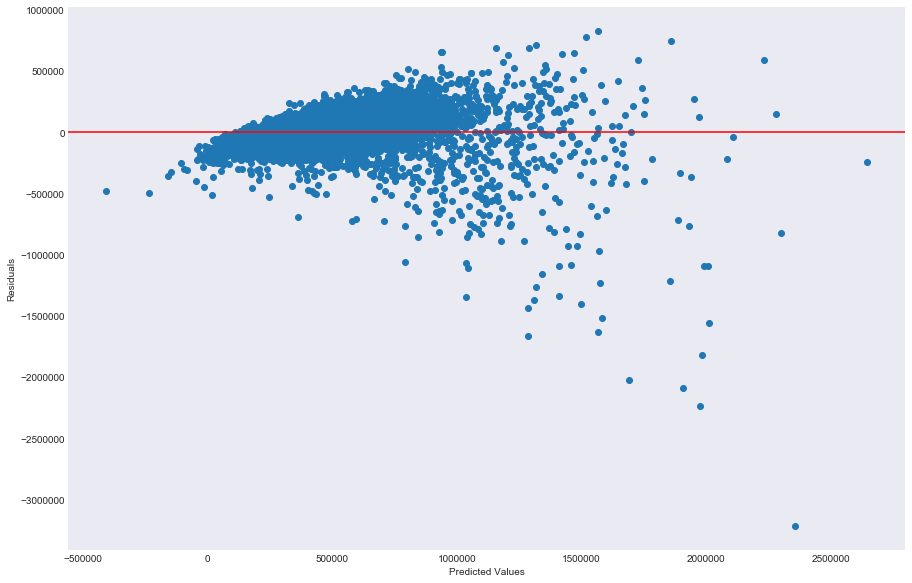

--------------------------
R squared: 0.71
Test Residuals Normal 0.0
Test Heteroskedasticity 4.68207928754e-150
Test Autocorrelation P-values: [ 0.03896548  0.10268259  0.19710575  0.21183568  0.27510329  0.36668648
  0.22540296  0.30317631  0.39361591  0.4040442 ]
The residuals are autocorrelated.
--------------------------
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'>
--------------------------
Residual sum of squares: 46066081662.574341


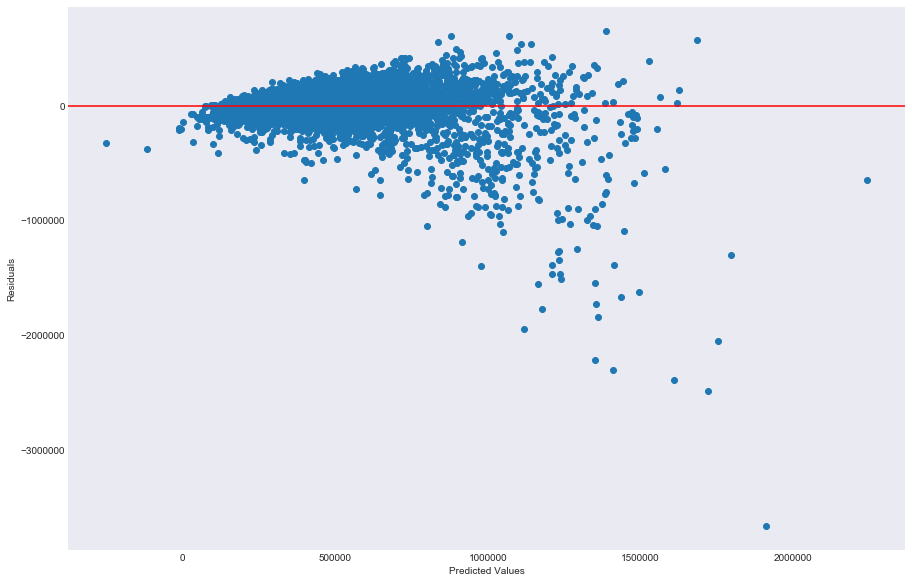

--------------------------
R squared: 0.66
Test Residuals Normal 0.0
Test Heteroskedasticity 2.28877452692e-178
Test Autocorrelation P-values: [ 0.23984042  0.48246475  0.69119686  0.77344128  0.87645125  0.83323232
  0.83302496  0.87369557  0.85749179  0.86466975]
The residuals are not autocorrelated.
--------------------------
<class 'sklearn.neighbors.regression.KNeighborsRegressor'>
--------------------------
Residual sum of squares: 27241161502.869064


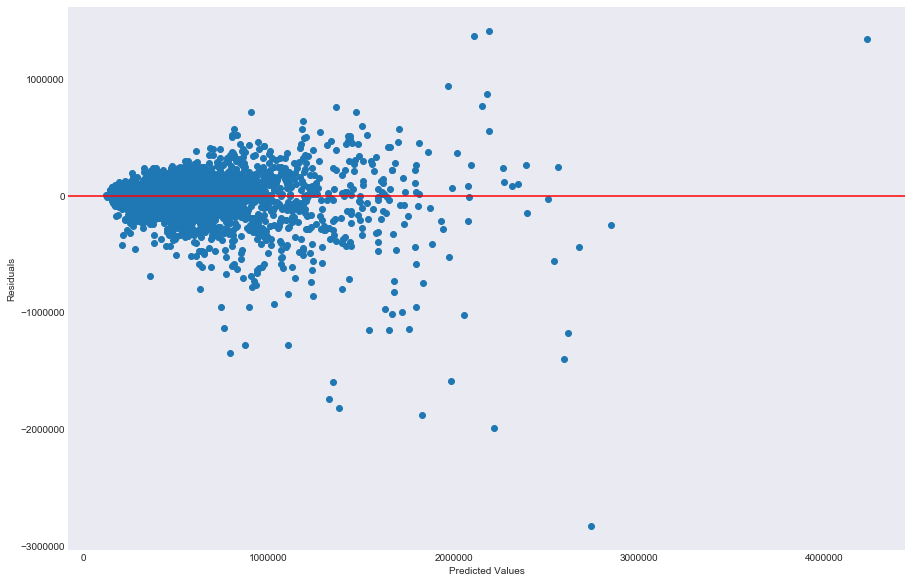

--------------------------
R squared: 0.80
Test Residuals Normal 0.0
Test Heteroskedasticity 7.0503696598e-157
Test Autocorrelation P-values: [ 0.9026073   0.96313736  0.90469195  0.93778231  0.9206582   0.96178805
  0.98113654  0.97467526  0.92760833  0.89343432]
The residuals are not autocorrelated.
--------------------------
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
--------------------------
Residual sum of squares: 34711439749.371323


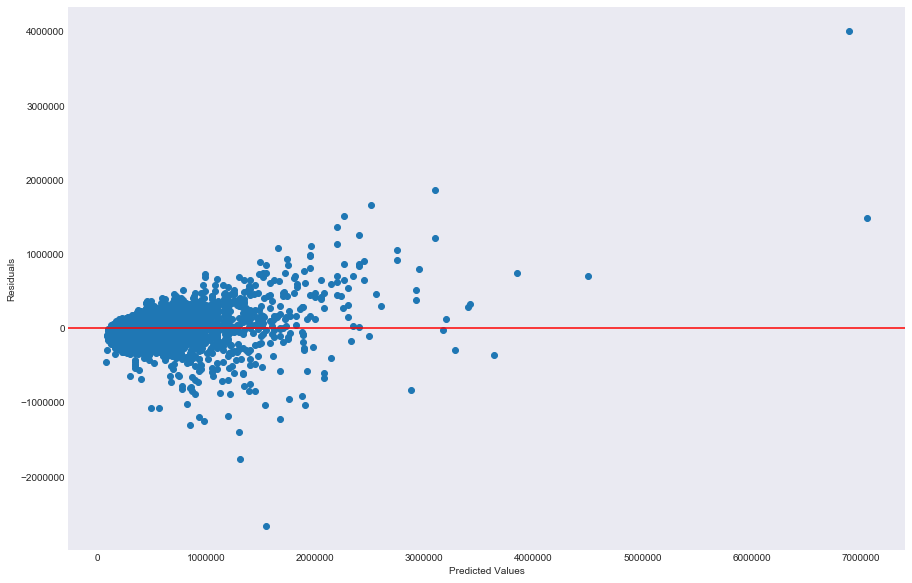

--------------------------
R squared: 0.74
Test Residuals Normal 0.0
Test Heteroskedasticity 6.13468200411e-111
Test Autocorrelation P-values: [ 0.04695919  0.13446726  0.04584443  0.08495236  0.14536534  0.12692386
  0.08145052  0.03945619  0.0625167   0.0836031 ]
The residuals are autocorrelated.
--------------------------
<class 'sklearn.svm.classes.SVR'>
--------------------------
Residual sum of squares: 142121367317.252930


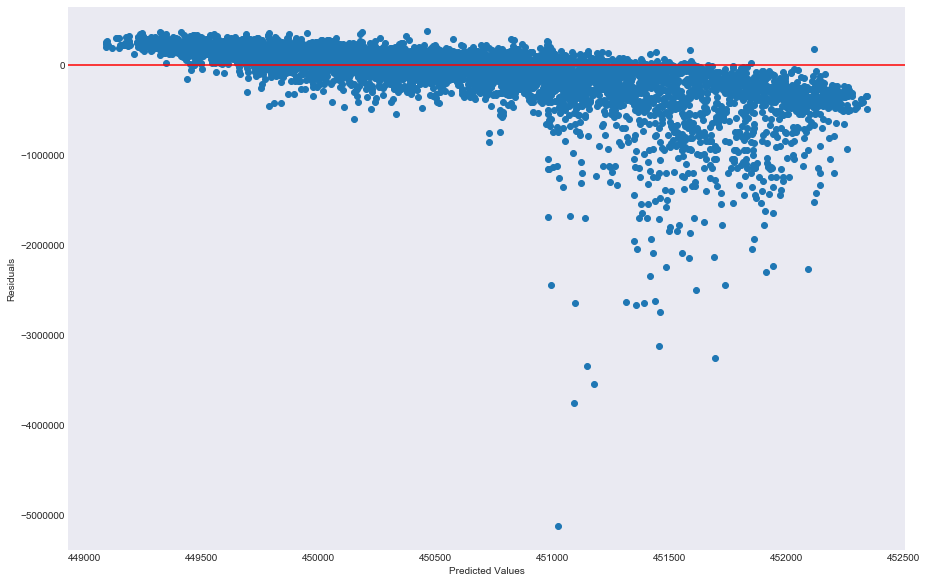

--------------------------
R squared: -0.06
Test Residuals Normal 0.0
Test Heteroskedasticity 1.32588771122e-311
Test Autocorrelation P-values: [ 0.96521779  0.9911391   0.99844957  0.99939731  0.87539437  0.88534134
  0.91847294  0.90367693  0.87889579  0.92427367]
The residuals are not autocorrelated.
--------------------------
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
--------------------------
Residual sum of squares: 17575935868.909775


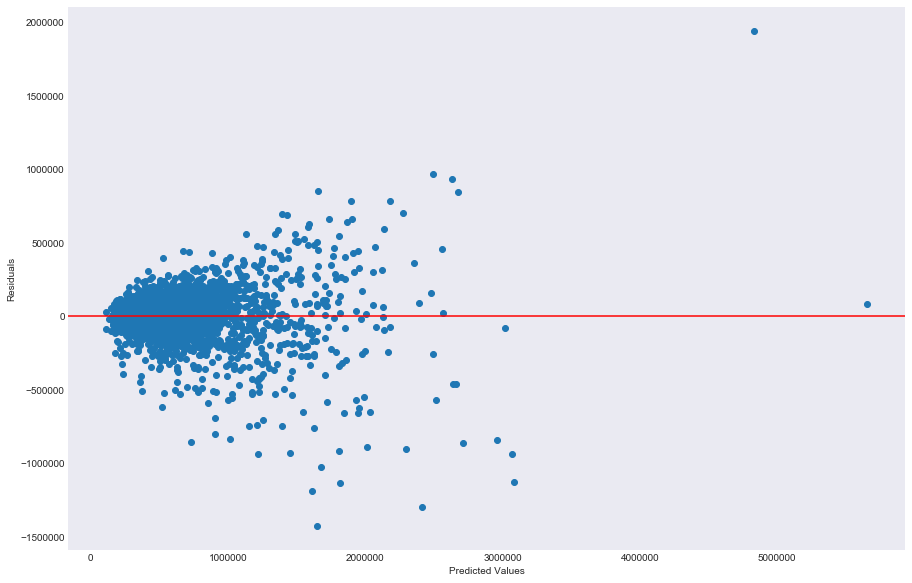

--------------------------
R squared: 0.87
Test Residuals Normal 0.0
Test Heteroskedasticity 1.2095784439e-198
Test Autocorrelation P-values: [ 0.8637633   0.85339252  0.95095349  0.98176607  0.99216147  0.95770322
  0.98003458  0.94665393  0.97081364  0.98314249]
The residuals are not autocorrelated.


C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')


--------------------------
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'>
--------------------------
Residual sum of squares: 125506075233.921249


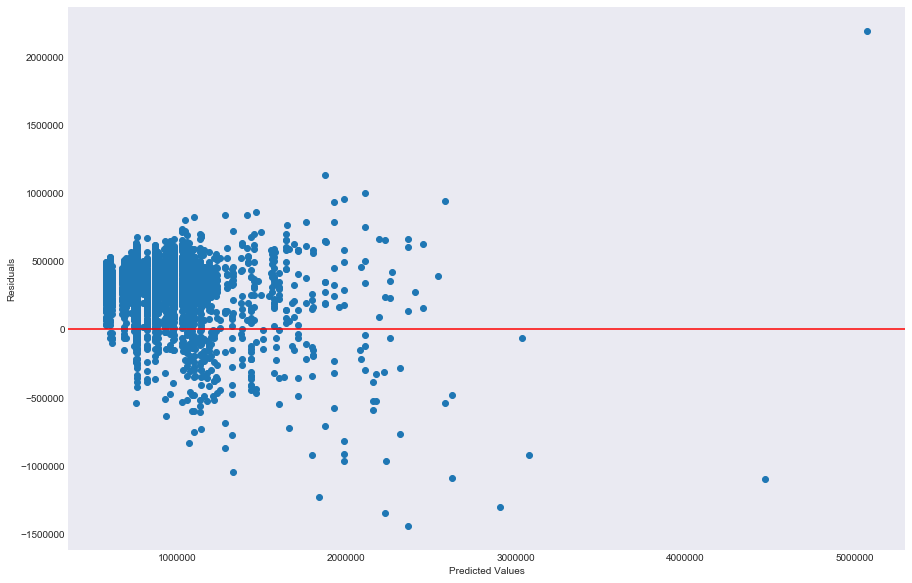

--------------------------
R squared: 0.07
Test Residuals Normal 0.0
Test Heteroskedasticity 2.56451881981e-86
Test Autocorrelation P-values: [ 0.71637404  0.2566546   0.43436142  0.6030079   0.74046615  0.70031167
  0.7839125   0.82425283  0.78500548  0.78793645]
The residuals are not autocorrelated.


C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')


--------------------------
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
--------------------------
Residual sum of squares: 17683716808.932690


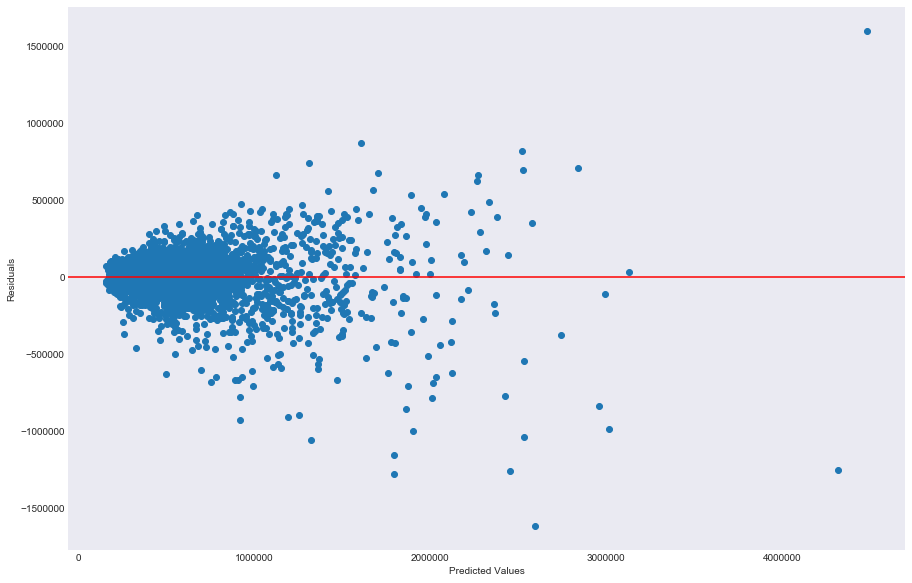

--------------------------
R squared: 0.87
Test Residuals Normal 0.0
Test Heteroskedasticity 5.53176288709e-194
Test Autocorrelation P-values: [ 0.47599899  0.69273514  0.86424149  0.93447167  0.97386805  0.99031064
  0.95456517  0.9134178   0.93631582  0.95115685]
The residuals are not autocorrelated.


In [85]:
model_fit_and_test(X_scaled,y_train,X_test_scaled,y_test)